#### Time series 

Time series data is basically f(t) where t = time. Given f(t), t = 0, 1, ...n, we want to predict the future. To do forecasting, we need the time series to be stationary process. 

https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/
https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1
https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

%matplotlib inline

plt.rcParams["figure.figsize"]=20,20

In [3]:
#!pip install numpy pandas matplotlib sklearn seaborn statsmodels stldecompose luminol

In [5]:
import statsmodels.api as sm

# the main library has a small set of functionality
#from stldecompose import decompose, forecast
#from stldecompose.forecast_funcs import (naive,
#                                         drift, 
#                                         mean, 
#                                         seasonal_naive)

In [3]:
'''['diskio_serviceTime', 'load_15min', 'process_summary_total',
       'network_out_dropped', 'load_1min', 'diskio_time', 'memory_used_pct',
       'memory_actual_free', 'system_uptime', 'network_in_dropped',
       'network_in_errors', 'timestamp', 'cpu_iowait_pct',
       'memory_actual_used_pct', 'diskio_busy',
       'integrationId', 'network_in_packets', 'process_summary_idle',
       'diskio_read_count', 'cpu_system_pct', 'network_out_errors',
       'process_summary_sleeping', 'network_out_packets',
       'cpu_user_pct', 'diskio_write_count', 'diskio_await',
       'process_summary_running']'''
x = ['timestamp']
x1 = ['diskio_serviceTime', 'load_15min', 'process_summary_total', 'load_1min', 'diskio_time', 'memory_used_pct',
       'memory_actual_free']
x2 = ['cpu_iowait_pct',
       'memory_actual_used_pct', 'diskio_busy',
       'integrationId', 'network_in_packets', 'process_summary_idle', 'timestamp']
x3 = ['diskio_read_count', 'cpu_system_pct', 'network_out_errors',
       'process_summary_sleeping', 'network_out_packets',
       'cpu_user_pct', 'timestamp']
x4 = ['diskio_write_count', 'diskio_await',
       'process_summary_running', 'system_uptime', 'network_in_dropped',
       'network_in_errors', 'timestamp']
x_work = ['diskio_serviceTime', 'process_summary_total', 'load_1min', 'memory_used_pct',
       'memory_actual_free', 'cpu_iowait_pct', 'cpu_user_pct']

In [4]:
# load dataset(14358661 metricsmay222pm.csv)
#df = pd.read_csv('data/metricsmay222pm.csv', usecols=['diskio_serviceTime','timestamp'])#, nrows=1000000, header=0, index_col=0
#df1 = pd.read_csv('data/metricsmay222pm.csv', usecols=x+[x1[0]])
df1 = pd.read_csv('data/metricsmay222pm.csv', usecols=x+x_work)
df1 = df1.replace("nan", np.nan)

# display first few rows
print(len(df1))
print(df1.size)
print(df1.head(5))

df1 = df1.dropna(subset=['timestamp'])
df1['timestamp_new'] = df1.loc[:,'timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ'))
df1.set_index('timestamp_new', inplace=True)
df1.drop('timestamp', axis=1, inplace=True)

print("Done")

NameError: name 'x' is not defined

In [4]:
# Save as pickle
df1.to_pickle("./dummy_work.pkl")

NameError: name 'df1' is not defined

In [9]:
# load pickle as DF
#df1 = pd.read_pickle("./dummy_work.pkl")
#df1.head(10)
#df1[['diskio_serviceTime']].describe()
print(df1['diskio_serviceTime'].max(),df1['diskio_serviceTime'].min(),df1['diskio_serviceTime'].median())


4600.0 0.0 0.0


In [3]:
# load pickle as DF
df1 = pd.read_pickle("./dummy.pkl")
df1.head()

,diskio_serviceTime
timestamp_new,
2019-01-28 08:56:15.556,0.000000
2019-01-28 08:56:15.556,0.163265
2019-01-28 08:56:25.551,0.000000
2019-01-28 08:56:25.551,0.000000
2019-01-28 08:56:25.554,0.000000


In [4]:
ts = df1.loc[:,['diskio_serviceTime']]
ts.sort_index(ascending=True, inplace=True)
ts.head(10)

,diskio_serviceTime
timestamp_new,
2019-01-28 08:56:15.556,0.000000
2019-01-28 08:56:15.556,0.163265
2019-01-28 08:56:25.551,0.000000
2019-01-28 08:56:25.551,0.000000
2019-01-28 08:56:25.554,0.000000
2019-01-28 08:56:25.554,0.000000
2019-01-28 08:56:25.555,0.000000
2019-01-28 08:56:25.555,0.000000
2019-01-28 08:56:25.556,0.000000


In [5]:
ts['diskio_serviceTime'].describe()

count    1.435865e+07
mean     8.058662e-02
std      3.278089e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.600000e+03
Name: diskio_serviceTime, dtype: float64

# Scale

In [19]:
from sklearn.preprocessing import StandardScaler

ts['diskio_serviceTime_scaled'] = StandardScaler().fit_transform(ts['diskio_serviceTime'].values.reshape(-1, 1))

Checking the stationarity

Assume we have time series data, for eg. stock prices (I'm highly innovative, i know) . 
What is stationary process?
* Mean = constant over all intervals.
* Variance = constant over all intervals.

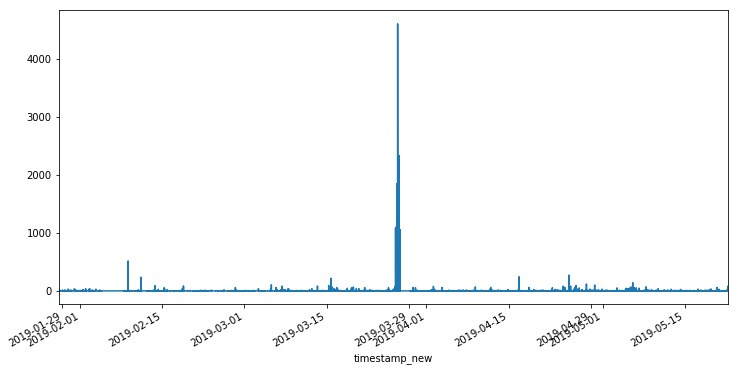

In [20]:
ts['diskio_serviceTime'].plot(figsize=(12,6))

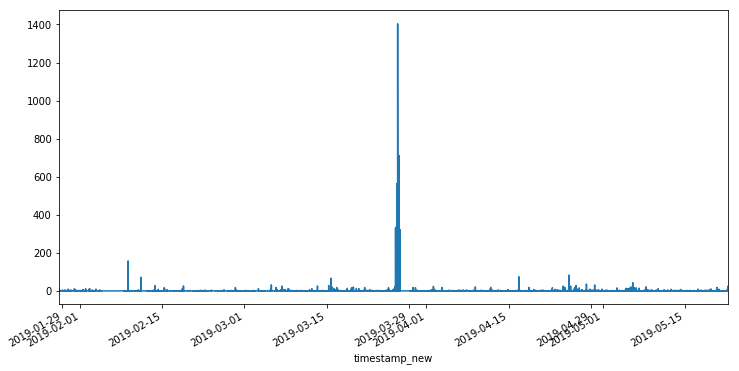

In [21]:
ts['diskio_serviceTime_scaled'].plot(figsize=(12,6))

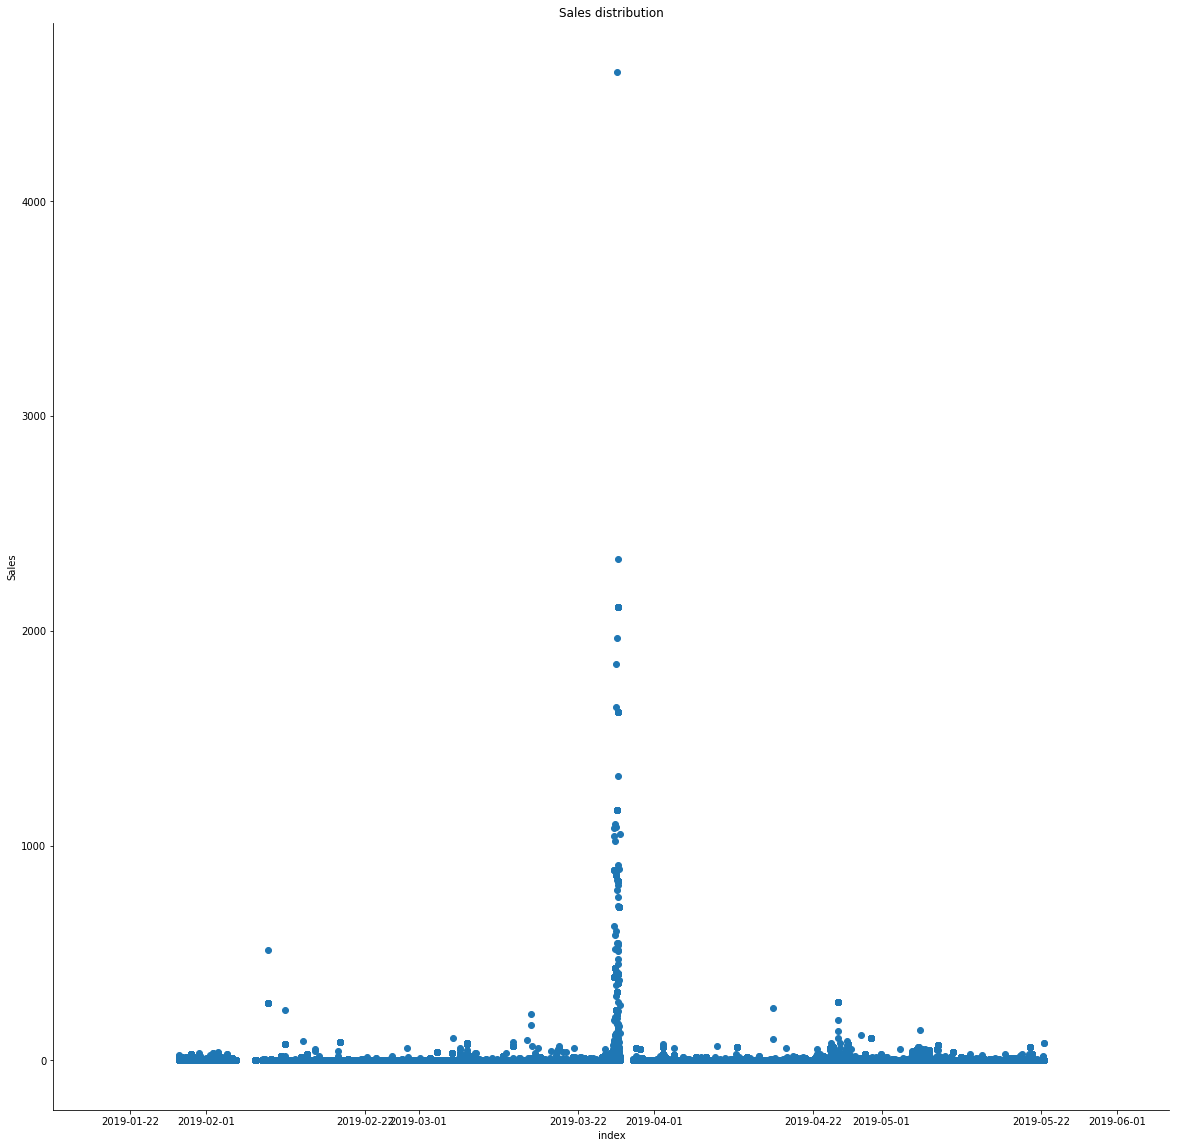

In [21]:
plt.scatter(ts.index, ts.values)#range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

In [ ]:
fig, axs = plt.subplots(len(ts.columns), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
fig.suptitle('Sharing both axes')

for ind, col in enumerate(ts.columns):
    axs[ind].plot(ts.loc[:, [col]])

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

#plt.plot(ts.loc[:, [col]])

In [ ]:
fig = plt.figure(figsize=(20,20))
for i, col in enumerate(ts.columns):
    ax=plt.subplot(6,6,i+1) 
    ts[[col]].plot(ax=ax)
    print(col)
plt.show()

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

* Constant mean
* Constant variance
* An autocovariance that does not depend on time.

<b>Plotting Rolling Statistics:</b> We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.

<b>Dickey-Fuller Test:</b> This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ```Test Statistic``` is less than the ```Critical Value```, we can reject the null hypothesis and say that the series is stationary.

In [6]:
from statsmodels.tsa.stattools import adfuller
#define function for kpss test
from statsmodels.tsa.stattools import kpss

def test_rolling_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=100).mean()
    rolstd = timeseries.rolling(window=100).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
def test_adfuller_stationarity(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
def test_stationarity_mean(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=100).mean()
    rolstd = timeseries.rolling(window=100).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)

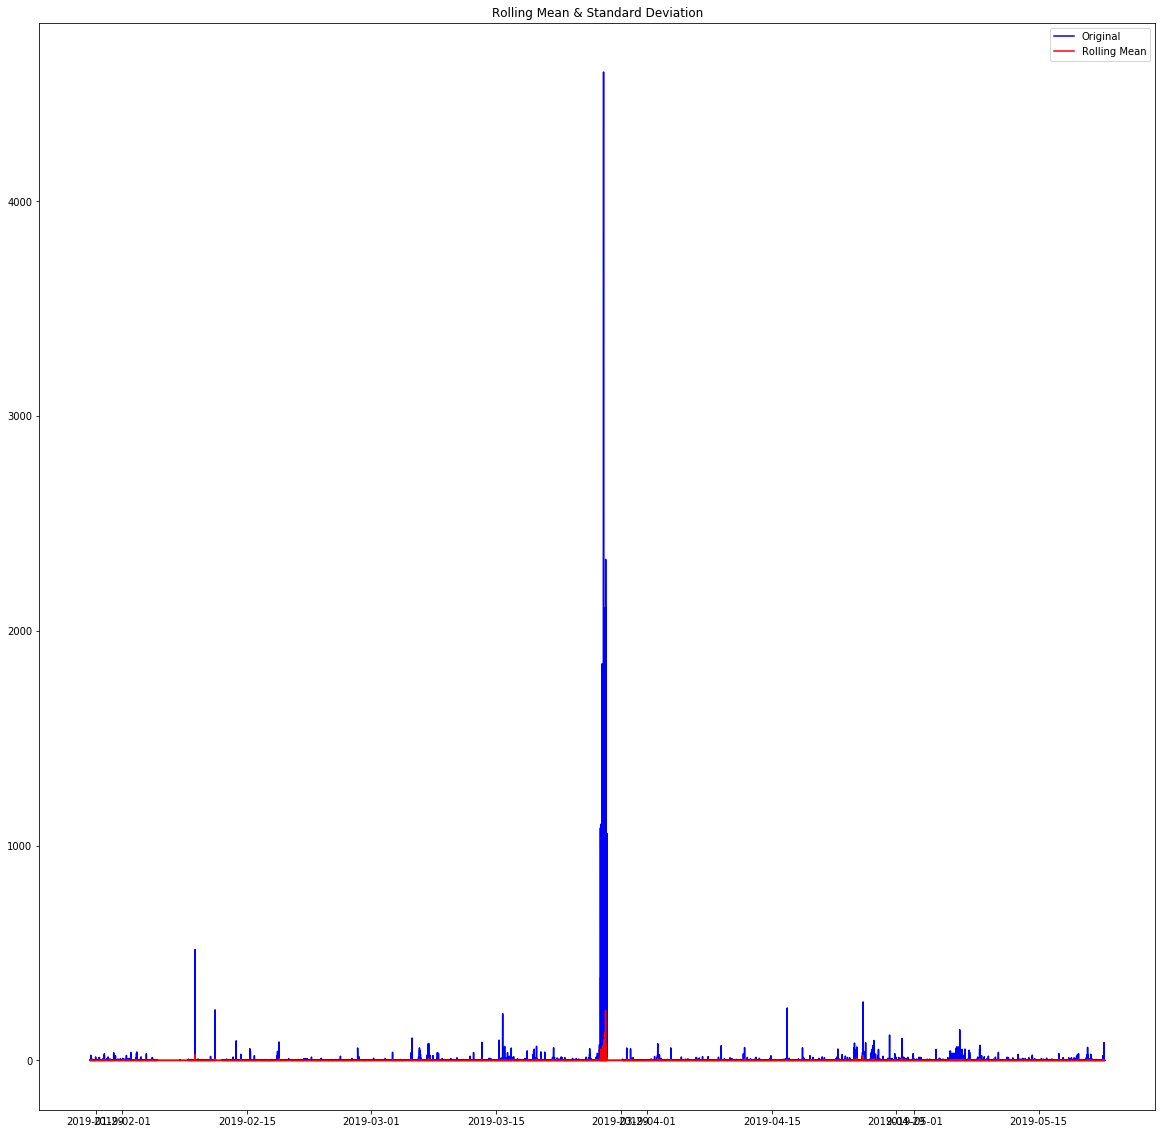

In [28]:
test_stationarity_mean(ts)

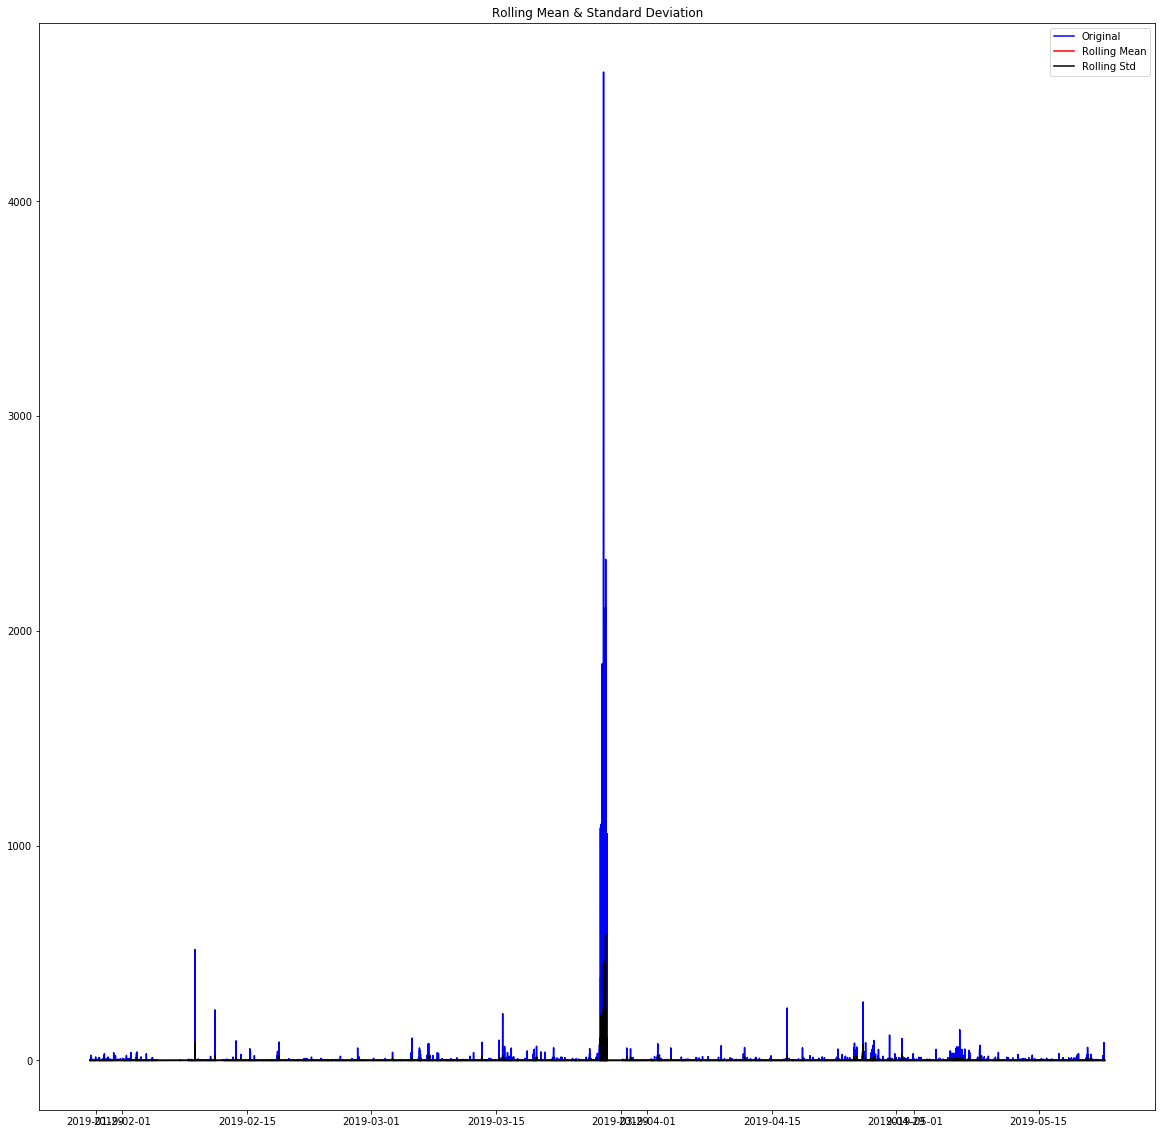

In [26]:
test_stationarity(ts)

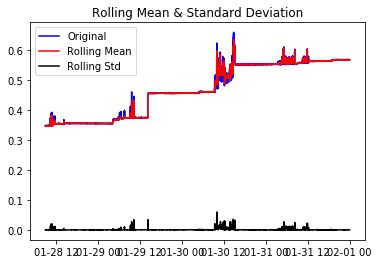

Results of Dickey-Fuller Test:


In [ ]:
test_stationarity(ts.loc[:'2019-01','memory_actual_used_pct'])

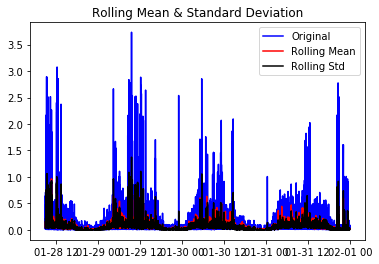

In [10]:
test_stationarity(ts.loc[:'2019-01','cpu_system_pct'])

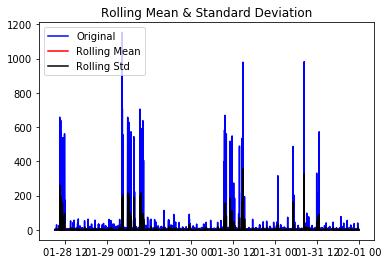

In [9]:
test_stationarity(ts.loc[:'2019-01','diskio_await'])

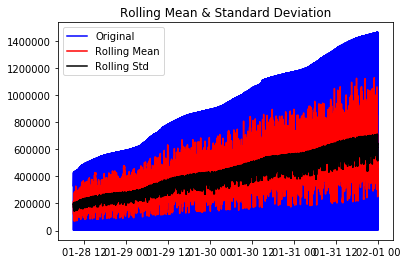

In [11]:
test_stationarity(ts.loc[:'2019-01','diskio_write_count'])

Therefore, the time series is not stationary.

Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS:
1. **Trend** – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. **Seasonality** – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.


To eliminate **trend** we will apply a transformation that makes the values more or less same, ie. we use log

#### One way to eliminate trend (that doesn't always work)

In [6]:
import math

def handle_inf(x):
    if float(x)==float("-inf"):
        return -0.0
    elif float(x)==float("inf"): 
        return 0.0
    else:
        return x

#ts_log = np.log(ts['diskio_serviceTime'])
ts_log = ts[['diskio_serviceTime']].apply(lambda x: np.log(x))
print(len(ts_log))
ts_log.dropna(inplace=True)
ts_log['diskio_serviceTime'] = ts_log['diskio_serviceTime'].apply(lambda x: handle_inf(x))
print(len(ts_log))

/home/achyuta/Achyuta/venv3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


14358651
14358651


In [9]:
ts_log.head()

,diskio_serviceTime
timestamp_new,
2019-01-28 08:56:15.556,-0.000000
2019-01-28 08:56:15.556,-1.812379
2019-01-28 08:56:25.551,-0.000000
2019-01-28 08:56:25.551,-0.000000
2019-01-28 08:56:25.554,-0.000000


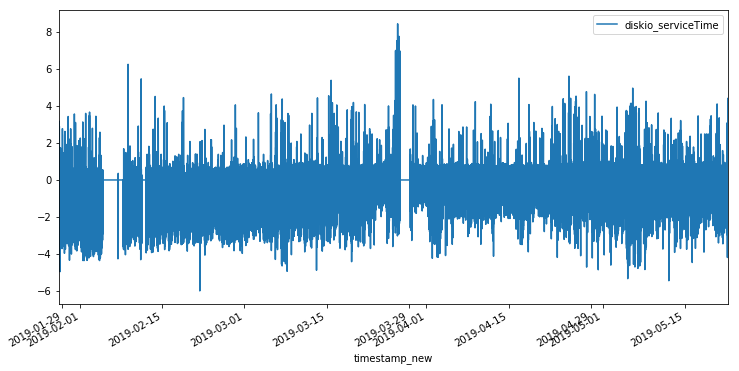

In [10]:
# after handle inf
ts_log.plot(figsize=(12,6))

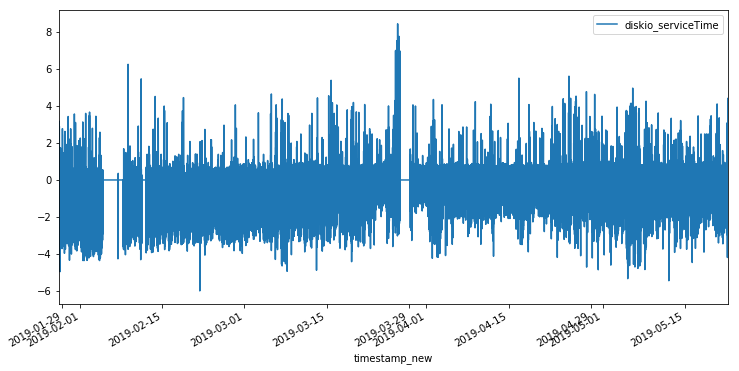

In [16]:
# after handle inf
ts_log.plot(figsize=(12,6))

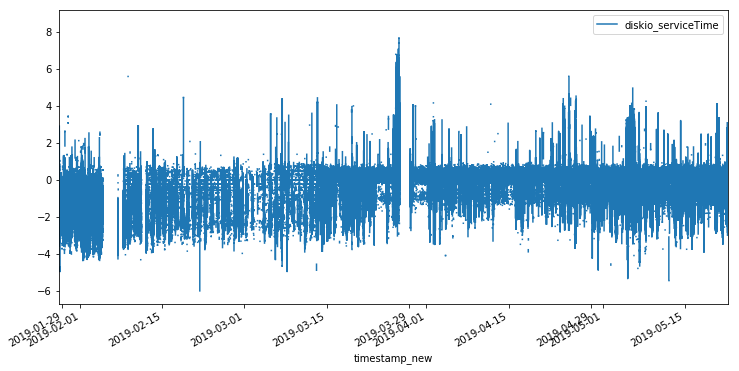

In [11]:
# before handle inf
ts_log.plot(figsize=(12,6))

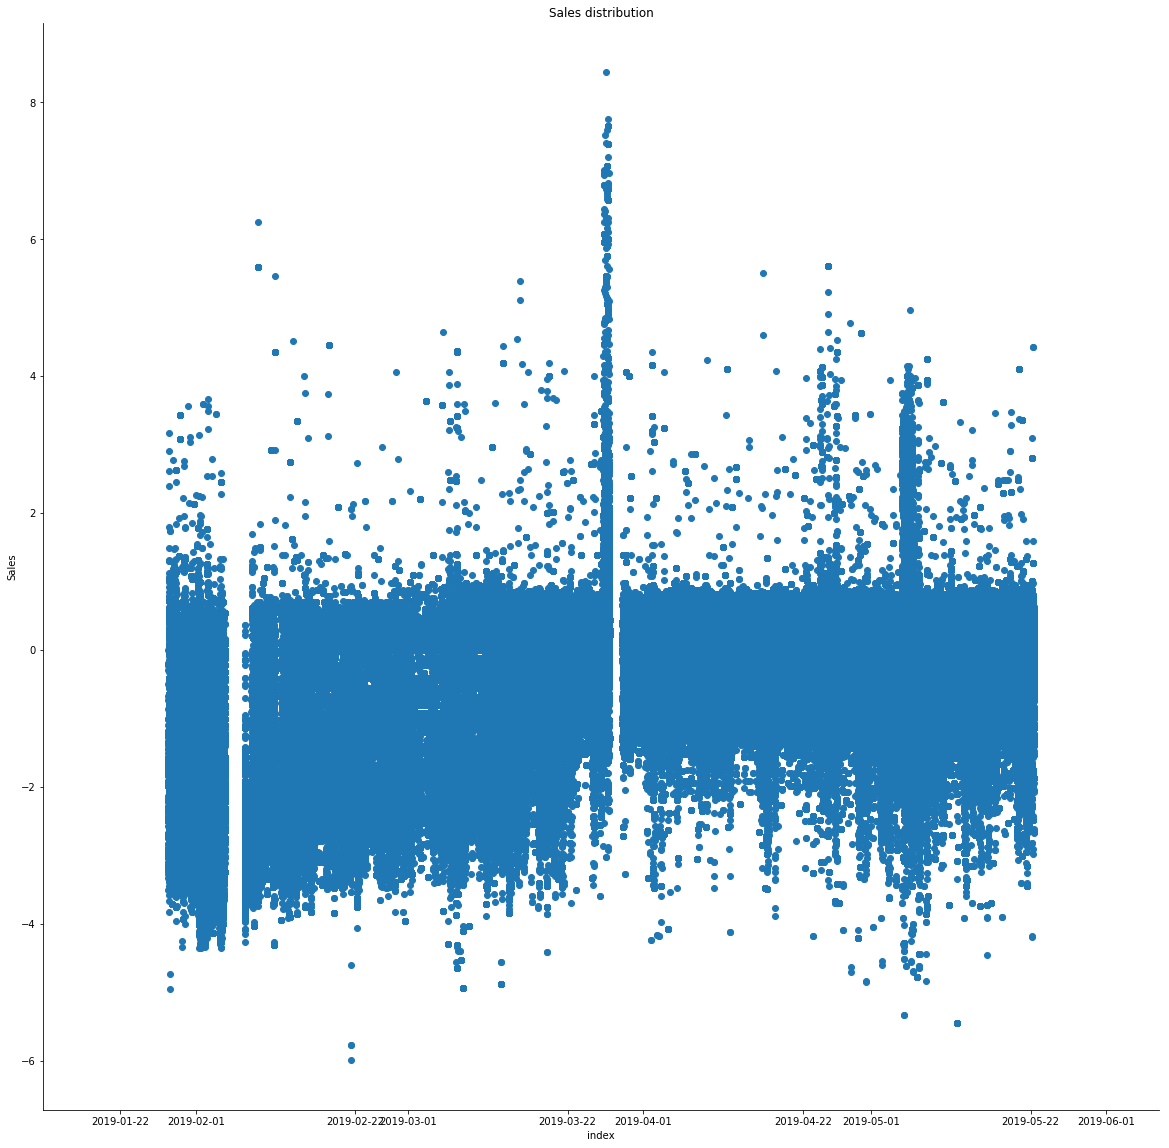

In [20]:
plt.scatter(ts_log.index, ts_log.values)#range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

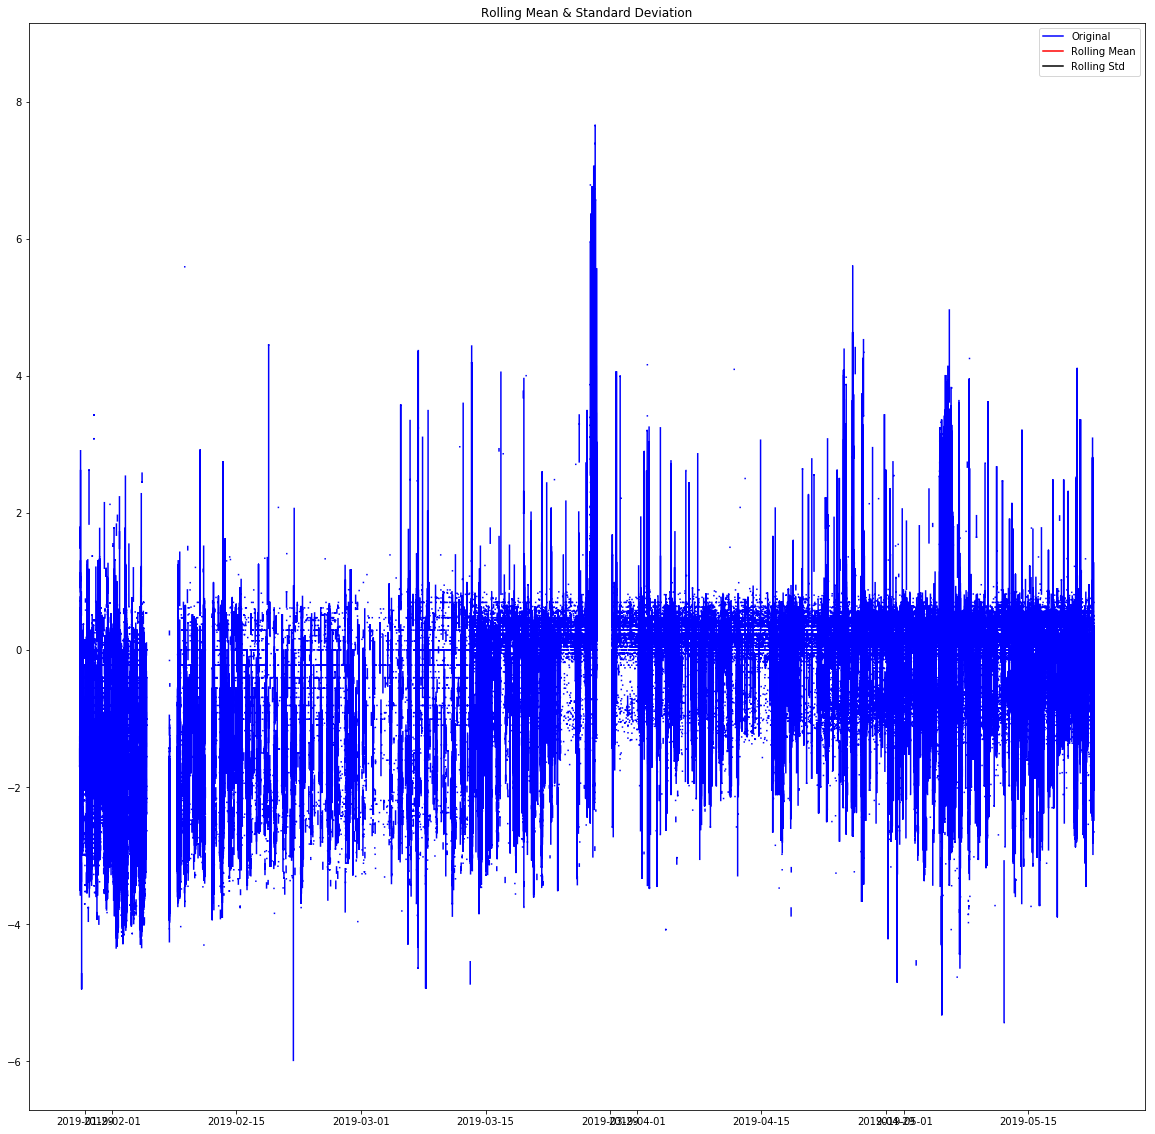

In [24]:
test_stationarity(ts_log)

In [ ]:
test_stationarity_mean(ts_log)

In [15]:
ts_log['diskio_serviceTime'].describe()

/home/achyuta/Achyuta/venv3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3949: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


count    1.435865e+07
mean             -inf
std               NaN
min              -inf
25%              -inf
50%               NaN
75%              -inf
max      8.433812e+00
Name: diskio_serviceTime, dtype: float64

In [7]:
ts_sqrt = np.sqrt(ts)
ts_sqrt['diskio_serviceTime'] = ts_sqrt['diskio_serviceTime'].apply(lambda x: handle_inf(x))

In [18]:
ts_sqr = np.square(ts)
ts_sqr['diskio_serviceTime'] = ts_sqr['diskio_serviceTime'].apply(lambda x: handle_inf(x))

In [17]:
ts_sqr.plot(figsize=(12,6))

NameError: name 'ts_sqr' is not defined

/home/achyuta/Achyuta/venv3.6/lib/python3.6/site-packages/pandas/plotting/_core.py:998: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


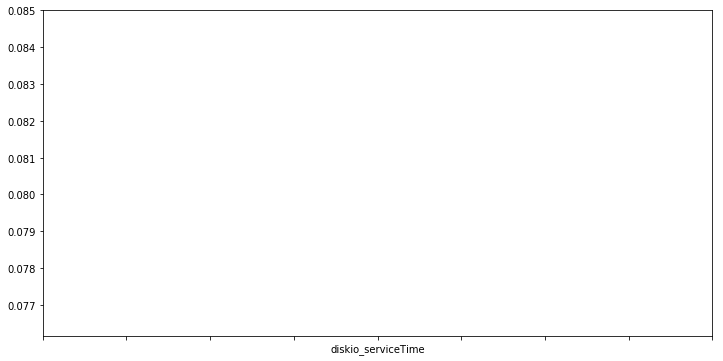

In [23]:
ts_mean = np.mean(ts)
#print(ts_mean)
ts_mean.plot(figsize=(12,6))

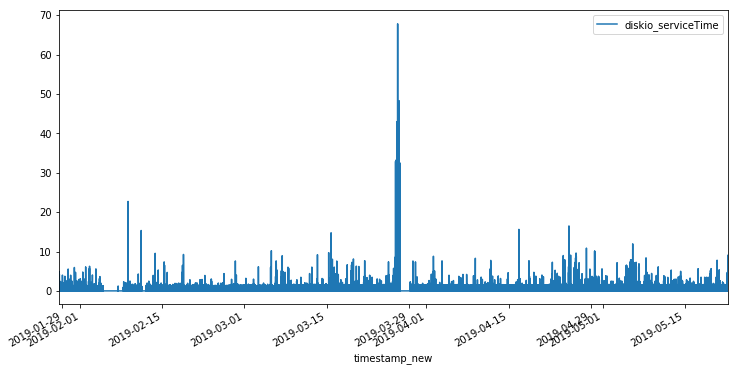

In [20]:
ts_sqrt.plot(figsize=(12,6))

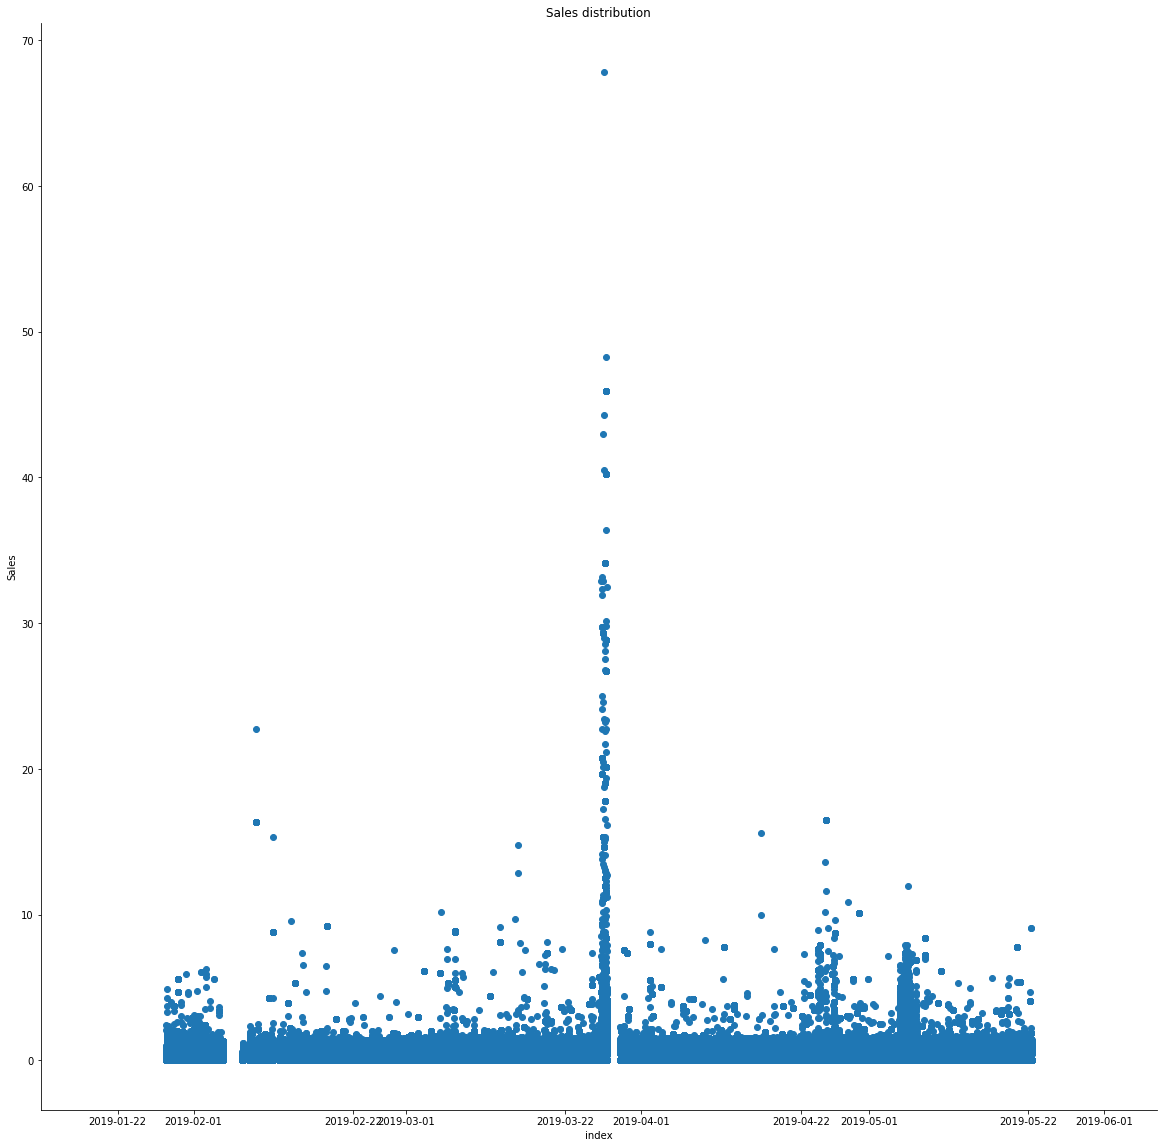

In [19]:
plt.scatter(ts_sqrt.index, ts_sqrt.values)#range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

In [ ]:
sns.distplot(ts_sqrt)
plt.title("Distribution of Sales")
sns.despine()

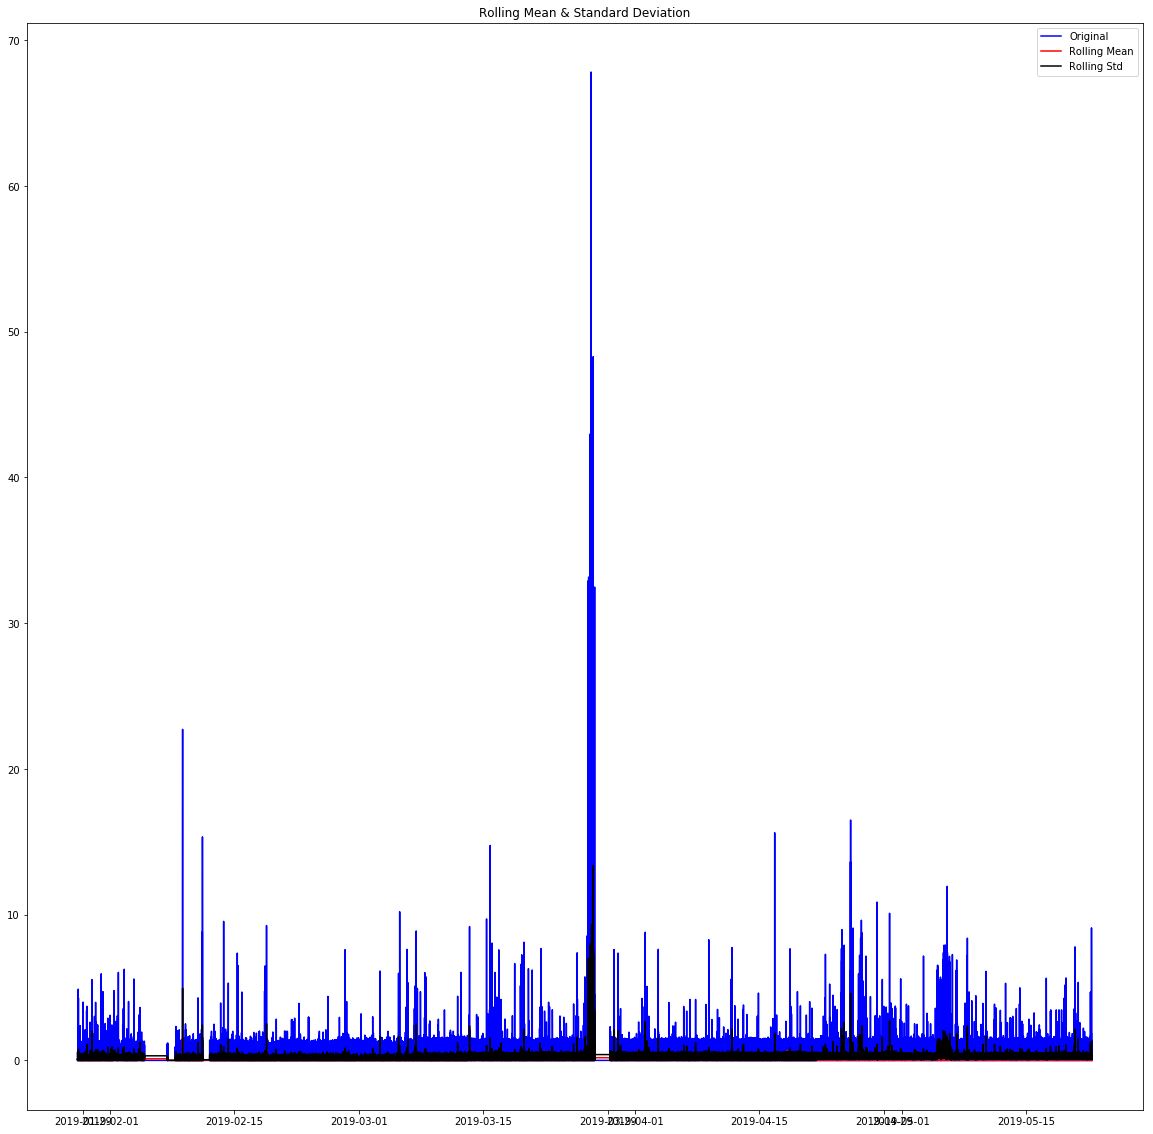

In [25]:
test_stationarity(ts_sqrt)

In [16]:
ts_sqrt['diskio_serviceTime'].describe()

count    1.435865e+07
mean     6.487164e-02
std      2.763662e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.782330e+01
Name: diskio_serviceTime, dtype: float64

In [15]:
#help(ts.rolling)

We will deal with the noise by taking rolling mean i.e. smoothing

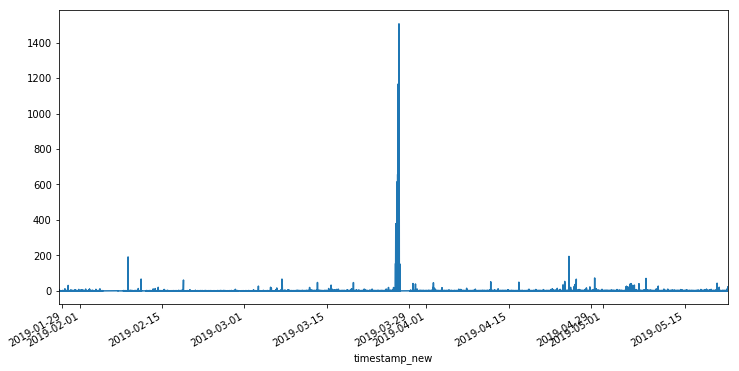

In [8]:
# Compute the centered 7-day rolling mean
opsd_7d = ts['diskio_serviceTime'].rolling(7, center=True).mean()
opsd_7d.head(10)
opsd_7d.plot(figsize=(12,6))

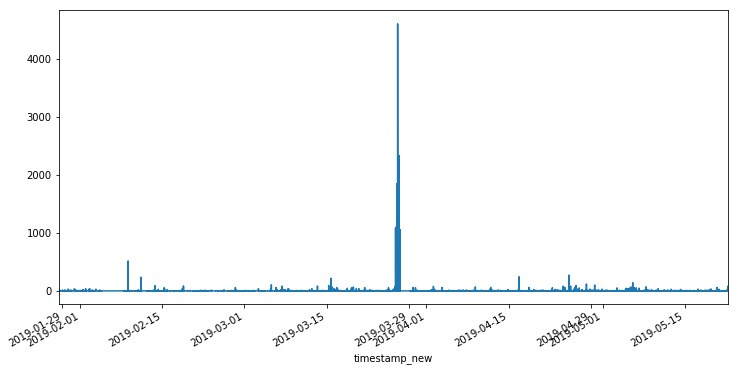

In [9]:
# Compute the centered 7-day rolling mean
opsd_1d = ts['diskio_serviceTime'].rolling(1, center=True).mean()
opsd_1d.head(10)
opsd_1d.plot(figsize=(12,6))

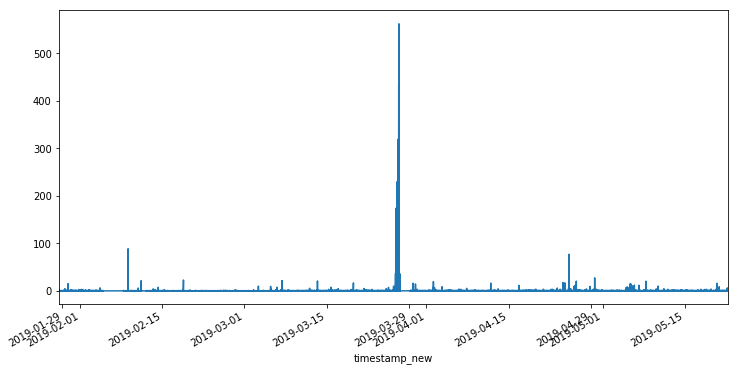

In [10]:
# Compute the centered 7-day rolling mean
opsd_30d = ts['diskio_serviceTime'].rolling(30, center=True).mean()
opsd_30d.head(10)
opsd_30d.plot(figsize=(12,6))

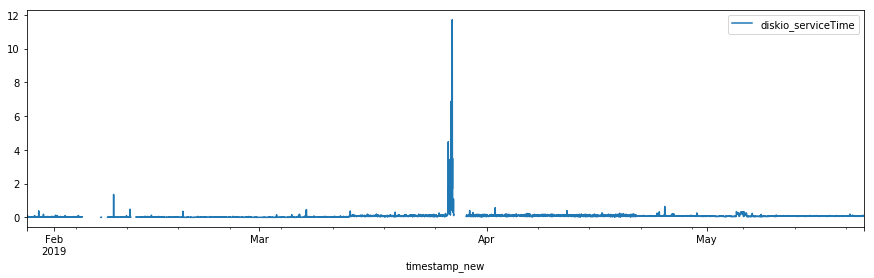

In [16]:
#T--> minute
ts.resample("30T").mean().plot(figsize=(15,4))

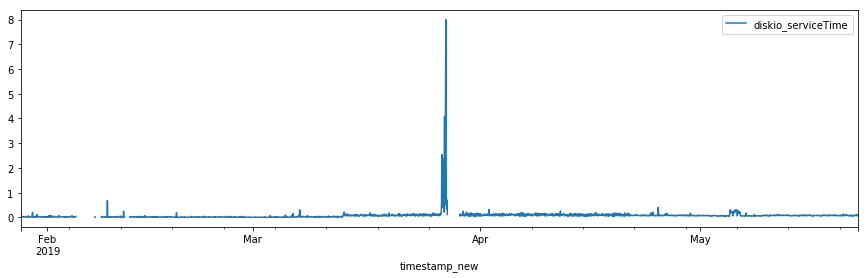

In [17]:
ts.resample("1H").mean().plot(figsize=(15,4))

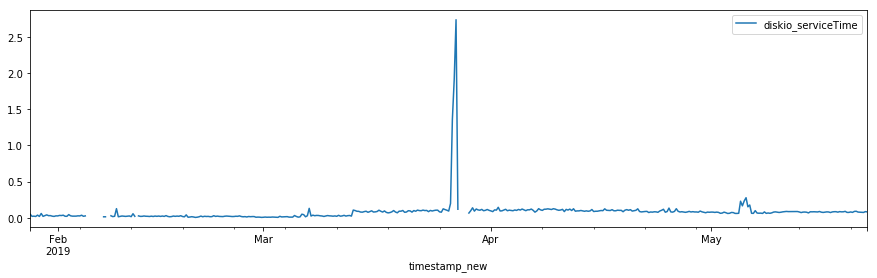

In [18]:
ts.resample("6H").mean().plot(figsize=(15,4))

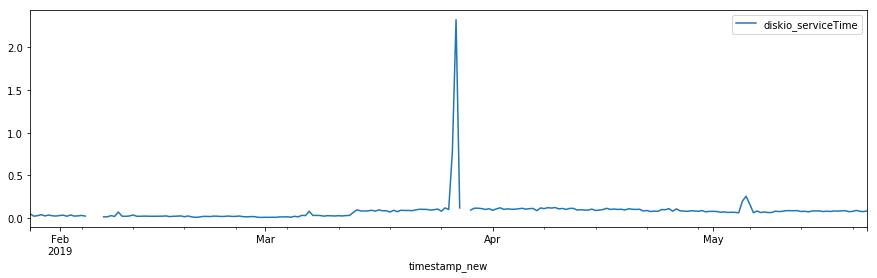

In [19]:
ts.resample("12H").mean().plot(figsize=(15,4))

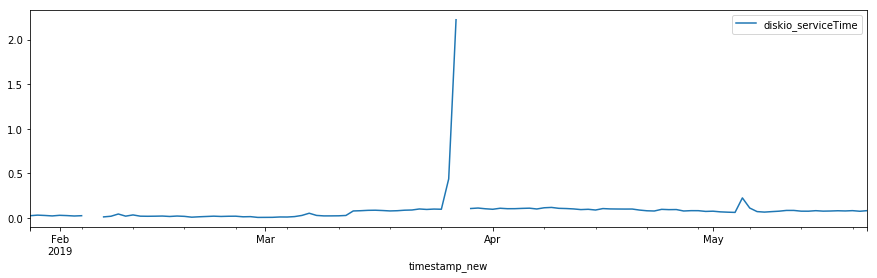

In [20]:
ts.resample("24H").mean().plot(figsize=(15,4))

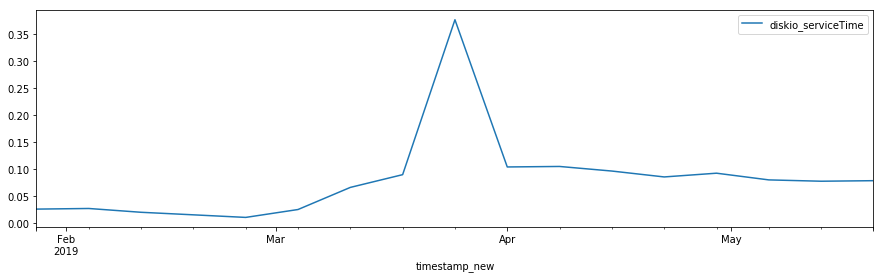

In [21]:
ts.resample("7D").mean().plot(figsize=(15,4))

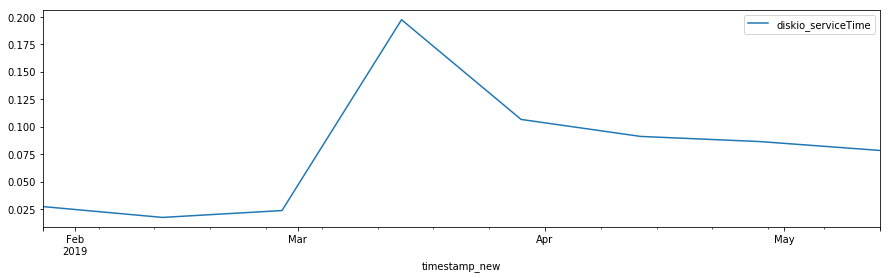

In [22]:
ts.resample("15D").mean().plot(figsize=(15,4))

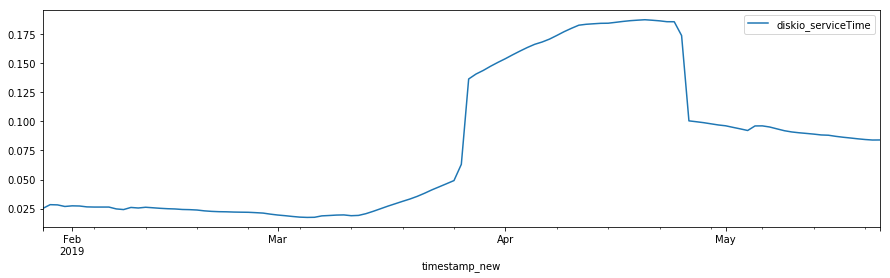

In [24]:
ts.resample("1D").mean().rolling('30D').mean().plot(figsize=(15,4))

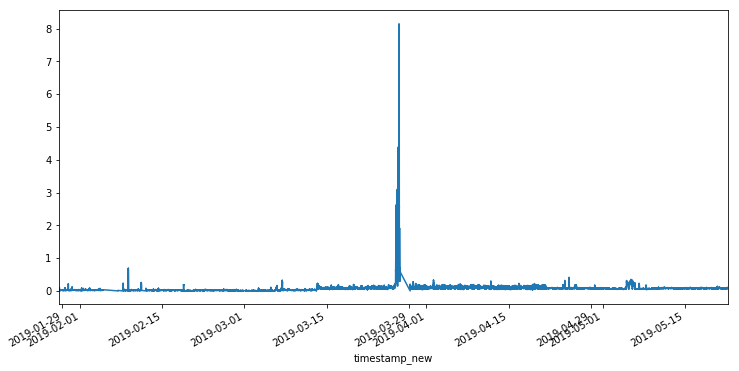

In [6]:
# Compute the centered 7-day rolling mean
opsd_1h = ts['diskio_serviceTime'].rolling('1H').mean()
opsd_1h.head(10)
opsd_1h.plot(figsize=(12,6))

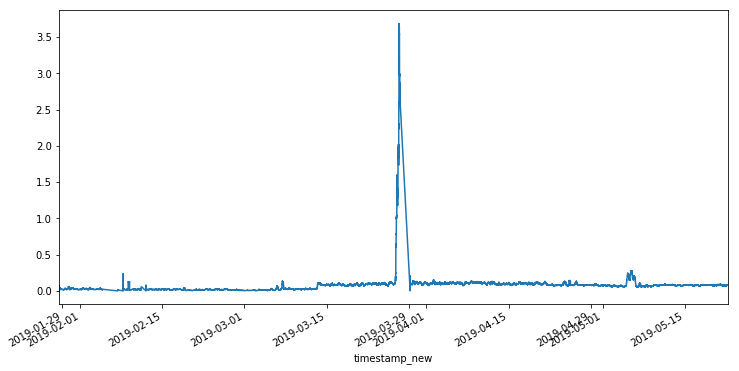

In [7]:
# Compute the centered 7-day rolling mean
opsd_6h = ts['diskio_serviceTime'].rolling('6H').mean()
opsd_6h.head(10)
opsd_6h.plot(figsize=(12,6))

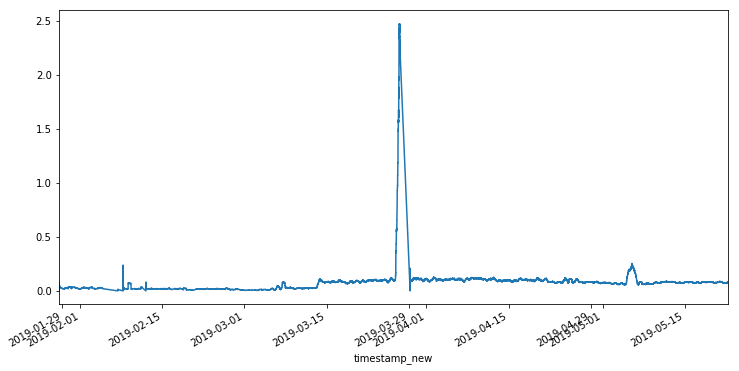

In [17]:
# Compute the centered 7-day rolling mean
opsd_12h = ts['diskio_serviceTime'].rolling('12H').mean()
opsd_12h.head(10)
opsd_12h.plot(figsize=(12,6))

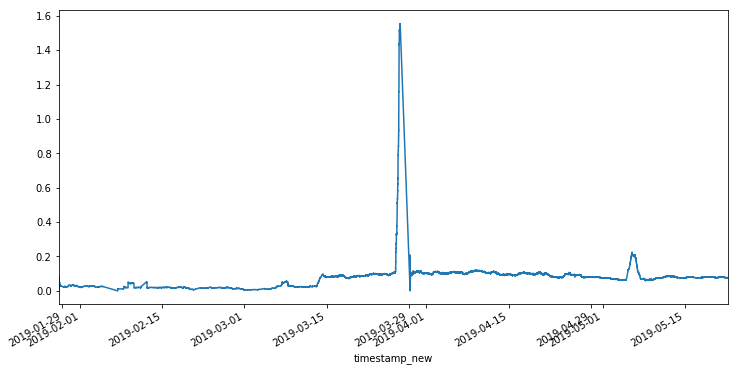

In [16]:
# Compute the centered 7-day rolling mean
# 1sec->1000us, 60sec->1min,1hr->60min, 1day->24hr
# 1day->1000*60*60*24 --> 86400000us/U
opsd_1D = ts['diskio_serviceTime'].rolling('1D').mean()
opsd_1D.head(10)
opsd_1D.plot(figsize=(12,6))

               diskio_serviceTime
timestamp_new                    
2019-01-28               0.025153
2019-01-29               0.031615
2019-01-30               0.027823
2019-01-31               0.022748
2019-02-01               0.029532


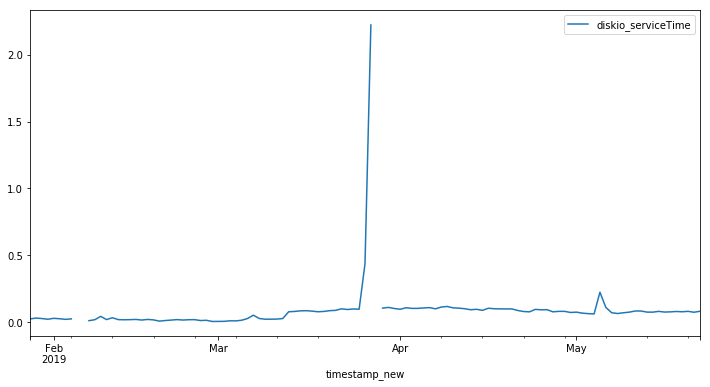

In [25]:
daily = ts.resample('D').mean()
print(daily.head())
daily.plot(figsize=(12,6))
#daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
#plt.ylabel('mean hourly count');

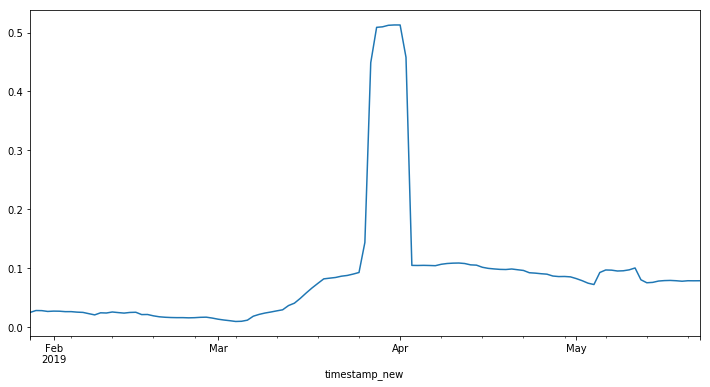

In [26]:
# Compute the centered 7-day rolling mean
# 1sec->1000us, 60sec->1min,1hr->60min, 1day->24hr
# 1day->1000*60*60*24 --> 86400000us/U
# 7day --> 86400000us/U*7 --> 604800000us
opsd_7D = daily['diskio_serviceTime'].rolling('7D').mean()
opsd_7D.head(10)
opsd_7D.plot(figsize=(12,6))

timestamp_new
2019-03-15    0.085380
2019-03-16    0.086634
2019-03-17    0.083231
2019-03-18    0.078659
2019-03-19    0.081135
2019-03-20    0.086864
2019-03-21    0.089123
2019-03-22    0.100658
2019-03-23    0.095434
2019-03-24    0.099555
2019-03-25    0.097544
2019-03-26    0.437584
2019-03-27    2.221979
2019-03-28         NaN
2019-03-29    0.105841
2019-03-30    0.111135
2019-03-31    0.102934
2019-04-01    0.097333
2019-04-02    0.108766
2019-04-03    0.103668
2019-04-04    0.103998
2019-04-05    0.107241
2019-04-06    0.109546
2019-04-07    0.100522
2019-04-08    0.114099
2019-04-09    0.117999
2019-04-10    0.107857
2019-04-11    0.105519
2019-04-12    0.101263
2019-04-13    0.093693
2019-04-14    0.097088
2019-04-15    0.088976
Freq: D, Name: diskio_serviceTime, dtype: float64


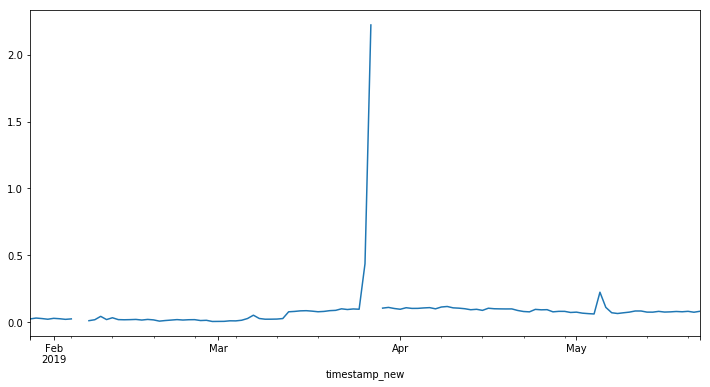

In [38]:
# Compute the centered 7-day rolling mean
opsd_30d = daily['diskio_serviceTime'].rolling('1D').mean()
print(opsd_30d['2019-mar-15':'2019-apr-15'].head(50))
opsd_30d.plot(figsize=(12,6))

In [9]:
daily = ts.resample('S').sum()
daily.head()
#daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
#plt.ylabel('mean hourly count');

,diskio_serviceTime
timestamp_new,
2019-01-28 08:56:15,0.163265
2019-01-28 08:56:16,0.000000
2019-01-28 08:56:17,0.000000
2019-01-28 08:56:18,0.000000
2019-01-28 08:56:19,0.000000


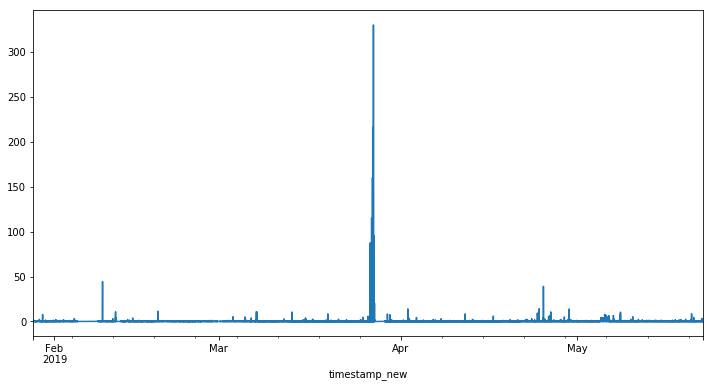

In [11]:
daily_1min = daily['diskio_serviceTime'].rolling('60S').mean()
daily_1min.head(10)
daily_1min.plot(figsize=(12,6))

In [13]:
daily_1min.head(10)

timestamp_new
2019-01-28 08:56:15    0.163265
2019-01-28 08:56:16    0.081633
2019-01-28 08:56:17    0.054422
2019-01-28 08:56:18    0.040816
2019-01-28 08:56:19    0.032653
2019-01-28 08:56:20    0.027211
2019-01-28 08:56:21    0.023324
2019-01-28 08:56:22    0.020408
2019-01-28 08:56:23    0.018141
2019-01-28 08:56:24    0.016327
Freq: S, Name: diskio_serviceTime, dtype: float64

timestamp_new
2019-01-28 08:56:15.556    0.000000
2019-01-28 08:56:15.556    0.081633
2019-01-28 08:56:25.551    0.054422
2019-01-28 08:56:25.551    0.040816
2019-01-28 08:56:25.554    0.032653
2019-01-28 08:56:25.554    0.027211
2019-01-28 08:56:25.555    0.023324
2019-01-28 08:56:25.555    0.020408
2019-01-28 08:56:25.556    0.018141
2019-01-28 08:56:25.556    0.016327
Name: diskio_serviceTime, dtype: float64


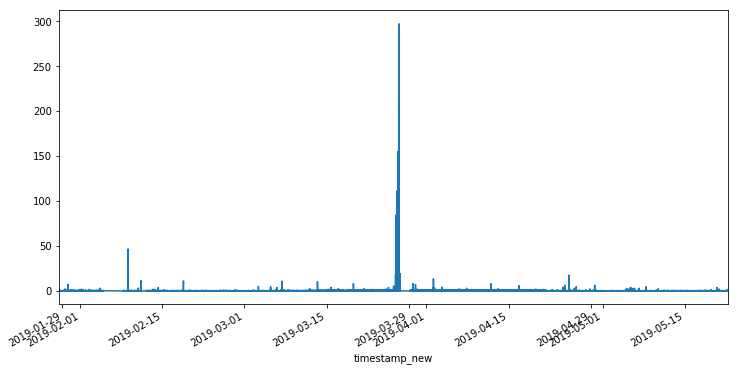

In [14]:
# Compute the centered 7-day rolling mean
# 1sec->1000us, 60sec->1min,1hr->60min, 1day->24hr
# 1day->1000*60*60*24 --> 86400000us/U
# 7day --> 86400000us/U*7 --> 604800000us
opsd_1min = ts['diskio_serviceTime'].rolling('60S').mean()
print(opsd_1min.head(10))
opsd_1min.plot(figsize=(12,6))

In [12]:
opsd_1min.head(10)

timestamp_new
2019-01-28 08:56:15.556    0.000000
2019-01-28 08:56:15.556    0.081633
2019-01-28 08:56:25.551    0.000000
2019-01-28 08:56:25.551    0.000000
2019-01-28 08:56:25.554    0.000000
2019-01-28 08:56:25.554    0.000000
2019-01-28 08:56:25.555    0.000000
2019-01-28 08:56:25.555    0.000000
2019-01-28 08:56:25.556    0.000000
2019-01-28 08:56:25.556    0.000000
Name: diskio_serviceTime, dtype: float64

In [21]:
ts_smooth = ts.rolling(window = 500).mean()#ts_log.rolling(window = 500).mean()
ts_smooth_median = ts.rolling(window = 500).median()
ts_smooth_std = ts.rolling(window = 500).std()

ts_smooth['diskio_serviceTime'] = ts_smooth['diskio_serviceTime'].apply(lambda x: handle_inf(x))
ts_smooth_median['diskio_serviceTime'] = ts_smooth_median['diskio_serviceTime'].apply(lambda x: handle_inf(x))
ts_smooth_std['diskio_serviceTime'] = ts_smooth_std['diskio_serviceTime'].apply(lambda x: handle_inf(x))
#plt.plot(ts_smooth, color = 'red')
#plt.plot(ts_smooth_median, color = 'pink')
#plt.plot(ts_smooth_std, color = 'yellow')
#plt.show()

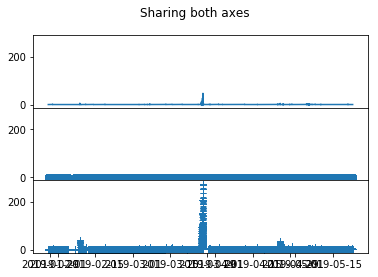

In [13]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
fig.suptitle('Sharing both axes')
axs[0].plot(ts_smooth)
axs[1].plot(ts_smooth_median, 'o')
axs[2].plot(ts_smooth_std, '+')

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

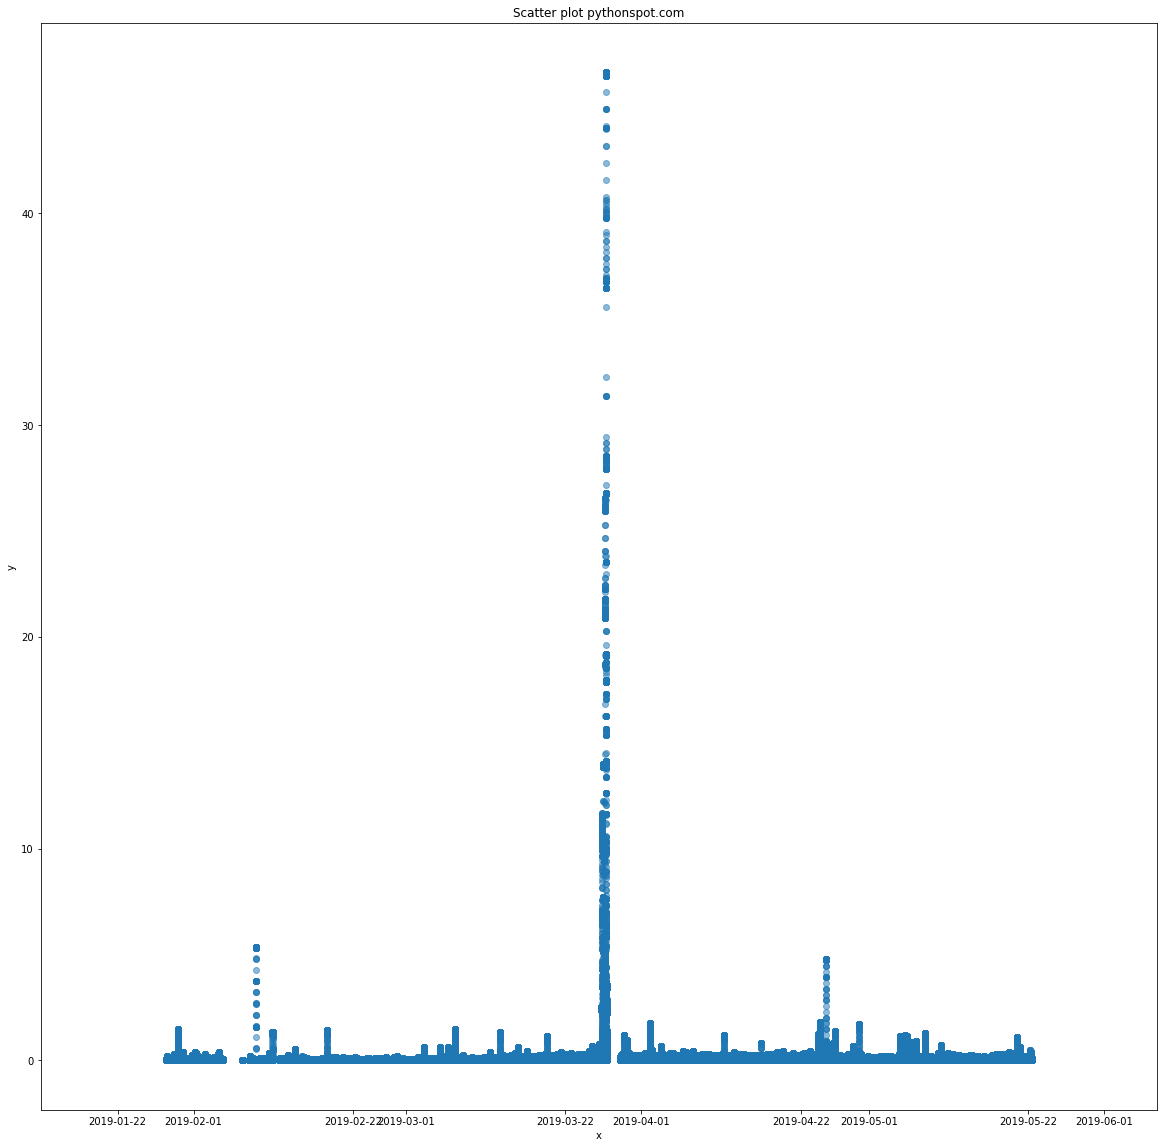

In [22]:
#ts_smooth = ts.rolling(window = 500).mean()#ts_log.rolling(window = 500).mean()
#ts_smooth_std = ts.rolling(window = 500).std()
#plt.plot(ts_smooth, color = 'red', kind='scatter')
#plt.plot(ts_smooth_std, kind='scatter')
#plt.show()

colors = ("red", "green", "blue")
plt.scatter(ts_smooth.index, ts_smooth, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

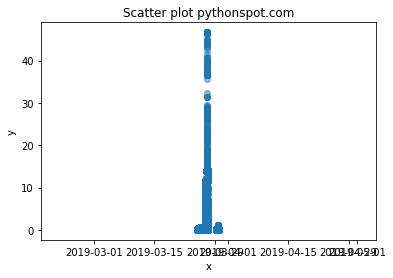

In [14]:
#ts_smooth = ts.rolling(window = 500).mean()#ts_log.rolling(window = 500).mean()
#ts_smooth_std = ts.rolling(window = 500).std()
#plt.plot(ts_smooth, color = 'red', kind='scatter')
#plt.plot(ts_smooth_std, kind='scatter')
#plt.show()
ts_smooth1 = ts_smooth['2019-03-25':'2019-03-29']
colors = ("red", "green", "blue")
plt.scatter(ts_smooth1.index, ts_smooth1, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

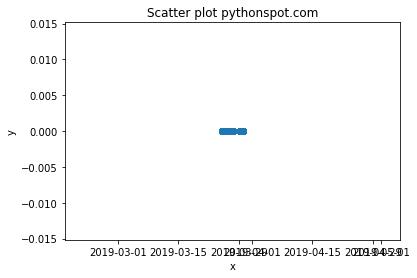

In [15]:
#ts_smooth = ts.rolling(window = 500).mean()#ts_log.rolling(window = 500).mean()
#ts_smooth_std = ts.rolling(window = 500).std()
#plt.plot(ts_smooth, color = 'red', kind='scatter')
#plt.plot(ts_smooth_std, kind='scatter')
#plt.show()
ts_smooth1 = ts_smooth_median['2019-03-25':'2019-03-29']
colors = ("red", "green", "blue")
plt.scatter(ts_smooth1.index, ts_smooth1, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

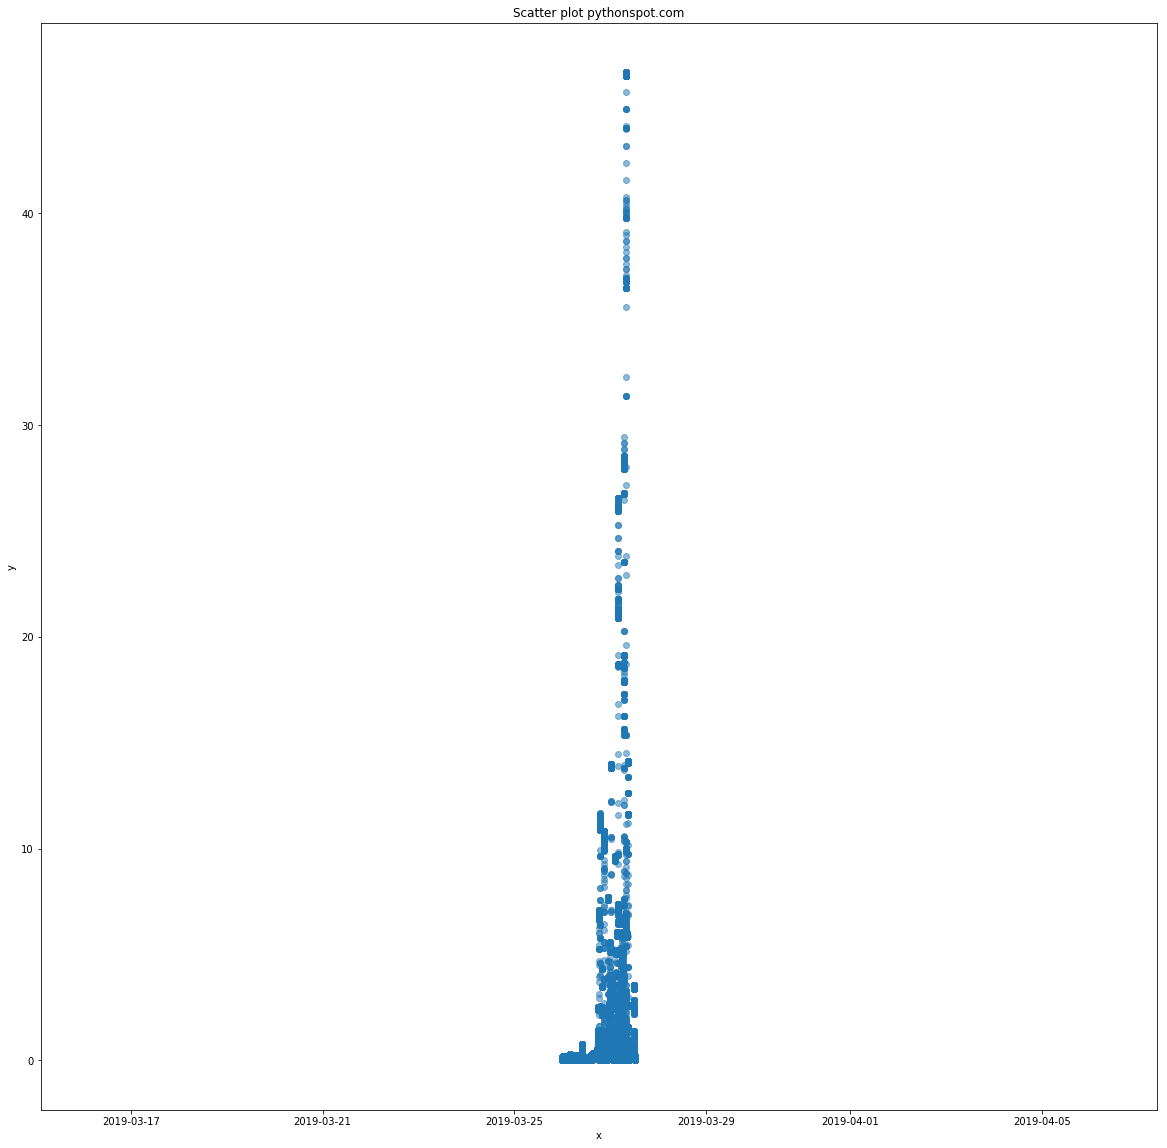

In [26]:
#ts_smooth = ts.rolling(window = 500).mean()#ts_log.rolling(window = 500).mean()
#ts_smooth_std = ts.rolling(window = 500).std()
#plt.plot(ts_smooth, color = 'red', kind='scatter')
#plt.plot(ts_smooth_std, kind='scatter')
#plt.show()
ts_smooth1 = ts_smooth['2019-03-26':'2019-03-28']
colors = ("red", "green", "blue")
plt.scatter(ts_smooth1.index, ts_smooth1, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Let's visualise exact anomaly data

In [32]:
print(ts_smooth1.head())
print(ts_smooth1.tail())
print(ts_smooth[1000:1010])
print(ts_smooth.tail())
print(ts_smooth_std.head())
print(ts_smooth_std.tail())

timestamp_new
2019-03-26 00:00:03.065    0.016989
2019-03-26 00:00:03.065    0.016989
2019-03-26 00:00:03.066    0.020037
2019-03-26 00:00:03.066    0.020037
2019-03-26 00:00:03.066    0.020037
Name: diskio_serviceTime, dtype: float64
timestamp_new
2019-03-27 12:35:13.066    0.135631
2019-03-27 12:35:13.066    0.135631
2019-03-27 12:35:13.066    0.135631
2019-03-27 12:35:13.066    0.135631
2019-03-27 12:35:13.089    0.135631
Name: diskio_serviceTime, dtype: float64
timestamp_new
2019-01-28 09:11:25.556    0.005934
2019-01-28 09:11:25.556    0.005934
2019-01-28 09:11:25.580    0.006210
2019-01-28 09:11:35.550    0.006485
2019-01-28 09:11:35.550    0.006761
2019-01-28 09:11:35.554    0.006761
2019-01-28 09:11:35.554    0.007037
2019-01-28 09:11:35.555    0.007313
2019-01-28 09:11:35.555    0.007589
2019-01-28 09:11:35.556    0.007589
Name: diskio_serviceTime, dtype: float64
timestamp_new
2019-05-22 10:00:48.066    0.064551
2019-05-22 10:00:48.066    0.064551
2019-05-22 10:00:48.066    0.

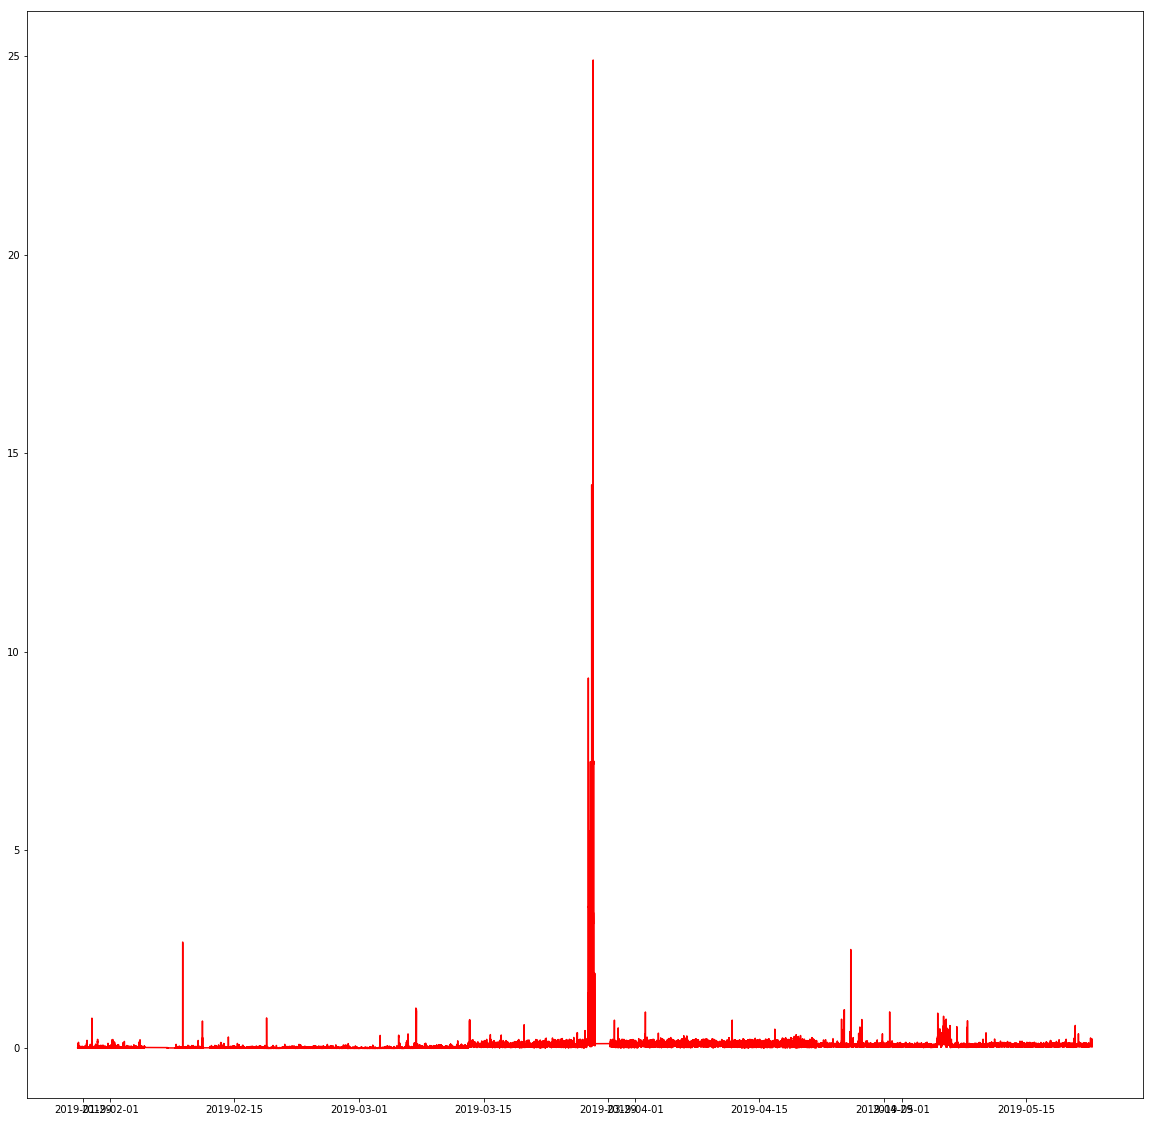

In [42]:
ts_smooth1 = ts.rolling(window = 1000).mean()#ts_log.rolling(window = 500).mean()
plt.plot(ts_smooth1, color = 'red')
#plt.plot(ts_log)
plt.show()

In [33]:
#len(ts_smooth)
ts_smooth.tail()

timestamp_new
2019-05-22 10:00:48.066    0.064551
2019-05-22 10:00:48.066    0.064551
2019-05-22 10:00:48.066    0.064551
2019-05-22 10:00:48.066    0.064551
2019-05-22 10:00:48.089    0.064551
Name: diskio_serviceTime, dtype: float64

In [22]:
# Case 1: No subtraction
no_sub_ts = ts_smooth.copy()
no_sub_ts.dropna(inplace = True)
no_sub_ts['diskio_serviceTime'] = no_sub_ts['diskio_serviceTime'].apply(lambda x: handle_inf(x))

# Case 2: Yes subtraction
sub_ts = ts_log - ts_smooth
sub_ts.dropna(inplace = True)
sub_ts['diskio_serviceTime'] = sub_ts['diskio_serviceTime'].apply(lambda x: handle_inf(x))

In [35]:
#ts_smooth[:5]
#ts_smooth.unique()

In [39]:
len(ts_smooth)

14358651

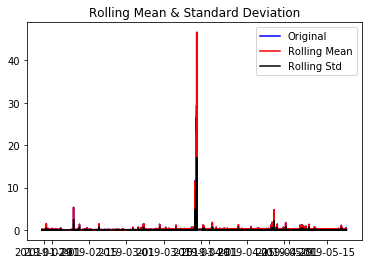

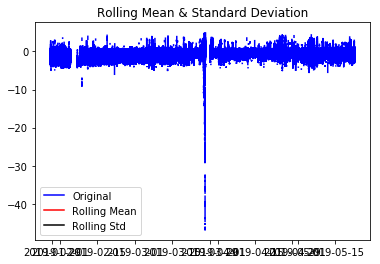

In [17]:
# Perform Dickey-Fuller on both
test_stationarity(no_sub_ts)
test_stationarity(sub_ts)

Exponential weighted average instead of rolling average

In [23]:
expwighted_avg = ts.ewm(halflife=500).mean()
expwighted_avg['diskio_serviceTime'] = expwighted_avg['diskio_serviceTime'].apply(lambda x: handle_inf(x))

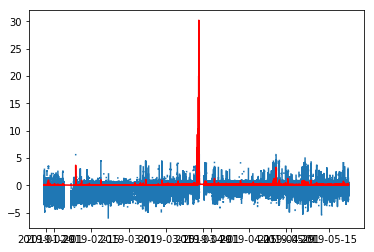

In [18]:
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

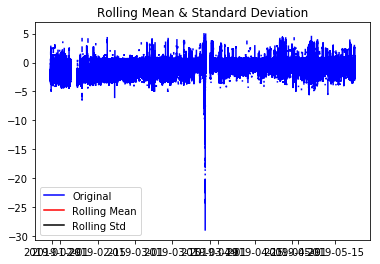

In [19]:
exp_ts_diff = ts_log-expwighted_avg
test_stationarity(exp_ts_diff)

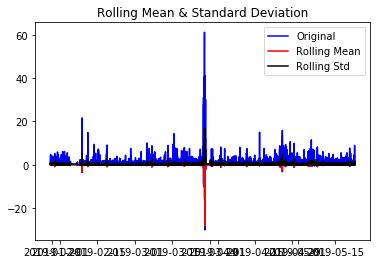

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [9]:
exp_ts_diff = ts_sqrt-expwighted_avg
test_stationarity(exp_ts_diff)

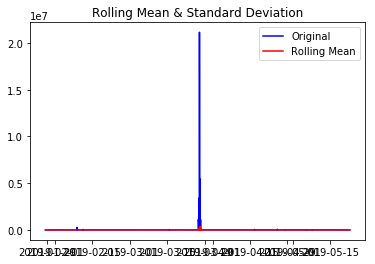

In [27]:
#exp_ts_diff = ts_sqrt-expwighted_avg
test_stationarity_mean(ts_sqr['diskio_serviceTime'])

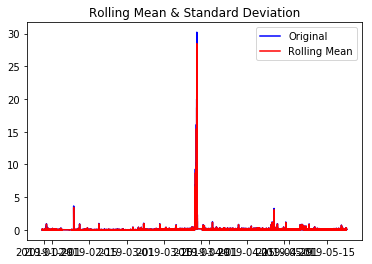

In [28]:
#exp_ts_diff = ts_sqrt-expwighted_avg
test_stationarity_mean(expwighted_avg['diskio_serviceTime'])

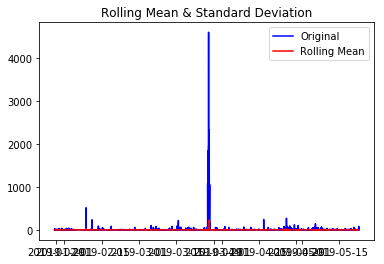

In [29]:
#exp_ts_diff = ts_sqrt-expwighted_avg
test_stationarity_mean(ts['diskio_serviceTime']-ts['diskio_serviceTime'].mean())

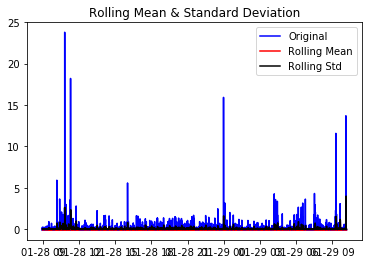

Results of Dickey-Fuller Test:
Test Statistic                   -38.377008
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    99954.000000
Critical Value (1%)               -3.430415
Critical Value (5%)               -2.861569
Critical Value (10%)              -2.566785
dtype: float64


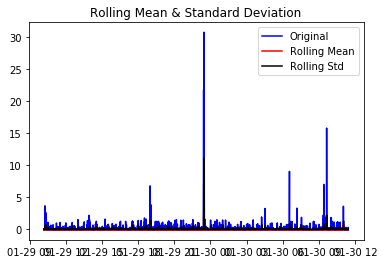

Results of Dickey-Fuller Test:
Test Statistic                   -35.954681
p-value                            0.000000
#Lags Used                        63.000000
Number of Observations Used    99936.000000
Critical Value (1%)               -3.430415
Critical Value (5%)               -2.861569
Critical Value (10%)              -2.566785
dtype: float64


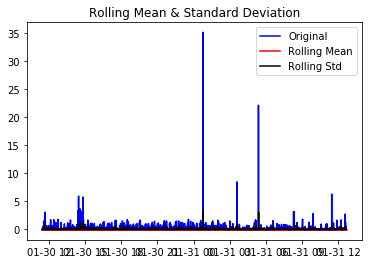

Results of Dickey-Fuller Test:
Test Statistic                   -30.677730
p-value                            0.000000
#Lags Used                        65.000000
Number of Observations Used    99934.000000
Critical Value (1%)               -3.430415
Critical Value (5%)               -2.861569
Critical Value (10%)              -2.566785
dtype: float64


In [32]:
#ts_mean_diff = ts['diskio_serviceTime']-ts['diskio_serviceTime'].mean()
test_stationarity(ts_mean_diff[:100000])
test_stationarity(ts_mean_diff[100000:200000])
test_stationarity(ts_mean_diff[200000:300000])

In [24]:
print("ts : ",ts.diskio_serviceTime.max(),ts.diskio_serviceTime.min())
print("ts_log : ",ts_log.diskio_serviceTime.max(),ts_log.diskio_serviceTime.min())
print("ts_sqrt : ",ts_sqrt.diskio_serviceTime.max(),ts_sqrt.diskio_serviceTime.min())
print("ts_square : ",ts_sqr.diskio_serviceTime.max(),ts_sqr.diskio_serviceTime.min())
print("expwighted_avg : ",expwighted_avg.diskio_serviceTime.max(),expwighted_avg.diskio_serviceTime.min())
print("ts_smooth : ",ts_smooth.diskio_serviceTime.max(),ts_smooth.diskio_serviceTime.min())
print("ts_smooth_std : ",ts_smooth_std.diskio_serviceTime.max(),ts_smooth_std.diskio_serviceTime.min())
print("ts_smooth_median : ",ts_smooth_median.diskio_serviceTime.max(),ts_smooth_median.diskio_serviceTime.min())
print(ts.diskio_serviceTime.mean())
print(ts_log.diskio_serviceTime.mean())
print(ts_sqrt.diskio_serviceTime.mean())
print(ts_sqr.diskio_serviceTime.mean())
print(expwighted_avg.diskio_serviceTime.mean())

ts :  4600.0 0.0
ts_log :  8.433811582477187 -5.990839382564064
ts_sqrt :  67.82329983125268 0.0
ts_square :  21160000.0 0.0
expwighted_avg :  30.210169085595613 0.0
ts_smooth :  46.660718104800026 0.0
ts_smooth_std :  274.97410478079877 0.0
ts_smooth_median :  0.022222223 0.0
0.08058661891855175
-0.01934867921701911
0.06487164127573569
10.752360084781577
0.08058425044190734


In [28]:
ts_shift = ts['diskio_serviceTime'] - ts['diskio_serviceTime'].shift(1)
ts_shift = ts_shift.apply(lambda x: handle_inf(x))
ts_shift.dropna().plot()

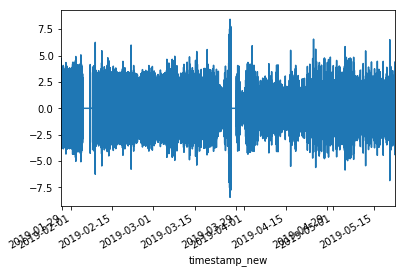

In [29]:
ts_log_shift = ts_log['diskio_serviceTime'] - ts_log['diskio_serviceTime'].shift(1)
ts_log_shift = ts_log_shift.apply(lambda x: handle_inf(x))
ts_log_shift.dropna().plot()

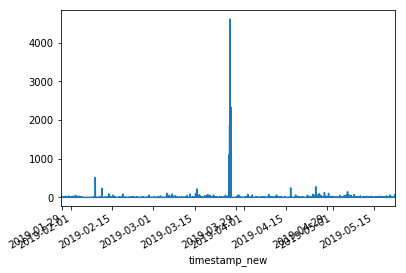

In [30]:
# mean difference
ts_mean_diff = ts['diskio_serviceTime']-ts['diskio_serviceTime'].mean()
ts_mean_diff = ts_mean_diff.apply(lambda x: handle_inf(x))
ts_mean_diff.dropna().plot()

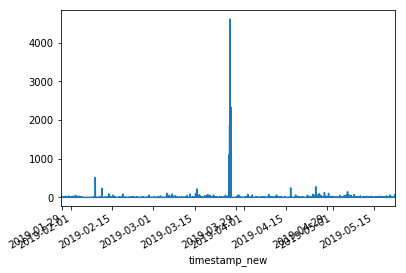

In [31]:
# mean difference
ts_median_diff = ts['diskio_serviceTime']-ts['diskio_serviceTime'].median()
ts_median_diff = ts_median_diff.apply(lambda x: handle_inf(x))
ts_median_diff.dropna().plot()

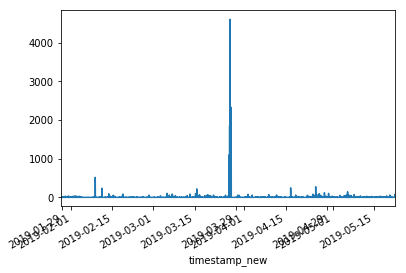

In [32]:
ts_median_diff = ts['diskio_serviceTime']-ts_smooth_median['diskio_serviceTime']
ts_median_diff = ts_median_diff.apply(lambda x: handle_inf(x))
ts_median_diff.dropna().plot()

In [33]:
kpss_test(ts['diskio_serviceTime'])
kpss_test(ts_log['diskio_serviceTime'])
kpss_test(ts_sqrt['diskio_serviceTime'])
kpss_test(ts_sqr['diskio_serviceTime'])
kpss_test(expwighted_avg['diskio_serviceTime'])
kpss_test(ts_smooth['diskio_serviceTime'])
kpss_test(ts_smooth_median['diskio_serviceTime'])
kpss_test(ts_mean_diff)
kpss_test(ts_shift)
kpss_test(ts_log_shift)
kpss_test(ts_median_diff)

Results of KPSS Test:


/home/achyuta/Achyuta/venv3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic            10.302777
p-value                    0.010000
Lags Used                234.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
Results of KPSS Test:


/home/achyuta/Achyuta/venv3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic           518.528583
p-value                    0.010000
Lags Used                234.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
Results of KPSS Test:


/home/achyuta/Achyuta/venv3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic           724.275432
p-value                    0.010000
Lags Used                234.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
Results of KPSS Test:


/home/achyuta/Achyuta/venv3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic             0.813544
p-value                    0.010000
Lags Used                234.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
Results of KPSS Test:


/home/achyuta/Achyuta/venv3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic            49.937914
p-value                    0.010000
Lags Used                234.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
Results of KPSS Test:
Test Statistic               NaN
p-value                      NaN
Lags Used                234.000
Critical Value (10%)       0.347
Critical Value (5%)        0.463
Critical Value (2.5%)      0.574
Critical Value (1%)        0.739
dtype: float64
Results of KPSS Test:
Test Statistic               NaN
p-value                      NaN
Lags Used                234.000
Critical Value (10%)       0.347
Critical Value (5%)        0.463
Critical Value (2.5%)      0.574
Critical Value (1%)        0.739
dtype: float64
Results of KPSS Test:


/home/achyuta/Achyuta/venv3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic            10.302777
p-value                    0.010000
Lags Used                234.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
Results of KPSS Test:
Test Statistic               NaN
p-value                      NaN
Lags Used                234.000
Critical Value (10%)       0.347
Critical Value (5%)        0.463
Critical Value (2.5%)      0.574
Critical Value (1%)        0.739
dtype: float64
Results of KPSS Test:
Test Statistic               NaN
p-value                      NaN
Lags Used                234.000
Critical Value (10%)       0.347
Critical Value (5%)        0.463
Critical Value (2.5%)      0.574
Critical Value (1%)        0.739
dtype: float64
Results of KPSS Test:
Test Statistic               NaN
p-value                      NaN
Lags Used                234.000
Critical Value (10%)       0.347
Critical Value (5%)        0.463
Critical V

In [ ]:
test_adfuller_stationarity(ts['diskio_serviceTime'])

Since test statistic is lower than 1% critical value, it means that we are 99% sure that we have a stationary series.

Other ways of eliminating trend and seasonality,
* Differencing
* Decomposition

**Differencing**

In [13]:
ts_diff = ts_log - ts_log.shift()
ts_diff.dropna(inplace = True)

kpss_test(ts_diff['diskio_serviceTime'])

Results of KPSS Test:


/home/achyuta/Achyuta/venv3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


Test Statistic             0.000009
p-value                    0.100000
Lags Used                234.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


/home/achyuta/Achyuta/venv3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [35]:
ts_diff = ts - ts_log.shift()
ts_diff.dropna(inplace = True)

kpss_test(ts_diff['diskio_serviceTime'])

Results of KPSS Test:
Test Statistic             2.321781
p-value                    0.010000
Lags Used                234.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


/home/achyuta/Achyuta/venv3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


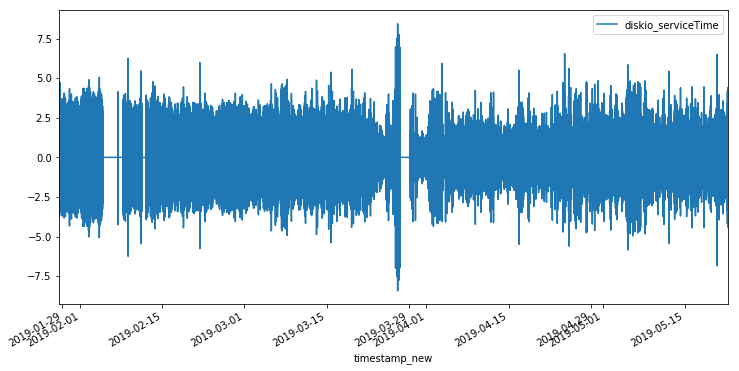

In [36]:
ts_diff = ts_log - ts_log.shift()
ts_diff.plot(figsize=(12,6))

How about differencing + exponential weighting?

In [ ]:
ts_diff_exp = ts_diff  - ts_diff.ewm(halflife = 12).mean()
ts_diff_exp.dropna(inplace = True)
kpss_test(ts_diff_exp['diskio_serviceTime'])

Great! We got confidence of 99%. 

** Decomposition **

In [9]:
#type(ts_log)
#ts_log.isnull().unique()
#ts_log.values
#ts_log.head()

In [8]:
#decomp = decompose(ts_log, period=365)

#decomp.plot()

In [10]:
'''
from statsmodels.tsa.seasonal import seasonal_decompose

ts_log.replace([np.inf, -np.inf], np.nan, inplace=True)
ts_log.fillna(0.0,inplace=True)
ts_log.dropna(inplace=True)
decomposition = seasonal_decompose(ts_log.values)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
'''

"\nfrom statsmodels.tsa.seasonal import seasonal_decompose\n\nts_log.replace([np.inf, -np.inf], np.nan, inplace=True)\nts_log.fillna(0.0,inplace=True)\nts_log.dropna(inplace=True)\ndecomposition = seasonal_decompose(ts_log.values)\n\ntrend = decomposition.trend\nseasonal = decomposition.seasonal\nresidual = decomposition.resid\n\nplt.subplot(411)\nplt.plot(ts_log, label='Original')\nplt.legend(loc='best')\nplt.subplot(412)\nplt.plot(trend, label='Trend')\nplt.legend(loc='best')\nplt.subplot(413)\nplt.plot(seasonal,label='Seasonality')\nplt.legend(loc='best')\nplt.subplot(414)\nplt.plot(residual, label='Residuals')\nplt.legend(loc='best')\nplt.tight_layout()\n"

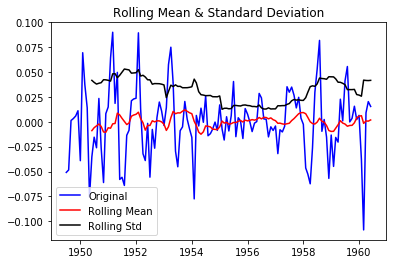

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (5%)           -2.885538e+00
Critical Value (1%)           -3.485122e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [101]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)
kpss_test(ts_diff_exp['diskio_serviceTime'])

# Anomaly

# Conditional Finding

In [12]:
ts_diff.describe()

,diskio_serviceTime
count,1.435865e+07
mean,1.518388e-21
std,2.709822e-01
min,-8.433812e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,8.433812e+00


In [34]:
print(len(ts_diff))
ts_diff_smooth = ts_diff.rolling(window = 500).mean()#ts_log.rolling(window = 500).mean()
ts_diff_smooth.fillna(0.0,inplace=True)
print(len(ts_diff_smooth))
#ts_diff_smooth.dropna(inplace = True)
#print(len(ts_diff_smooth))
ts_diff_smooth_median = ts_diff.rolling(window = 500).median()
ts_diff_smooth_median.fillna(0.0,inplace=True)
ts_diff_smooth_std = ts_diff.rolling(window = 500).std()
ts_diff_smooth_std.fillna(0.0,inplace=True)

14358650
14358650


In [14]:
print(len(ts_diff))
ts_diff_smooth = ts_diff.rolling('7D').mean()#ts_log.rolling(window = 500).mean()
ts_diff_smooth.fillna(0.0,inplace=True)
print(len(ts_diff_smooth))
#ts_diff_smooth.dropna(inplace = True)
#print(len(ts_diff_smooth))
ts_diff_smooth_median = ts_diff.rolling('7D').median()
ts_diff_smooth_median.fillna(0.0,inplace=True)
ts_diff_smooth_std = ts_diff.rolling('7D').std()
ts_diff_smooth_std.fillna(0.0,inplace=True)

14358650
14358650


In [15]:
ts_diff_absdiff = np.abs(ts_diff - ts_diff_smooth)

In [16]:
#ts_diff_smooth_std = ts_diff_smooth_std.rename('mv_std_dev')
#ts_diff_absdiff = ts_diff_absdiff.rename('mv_abs_mean_diff')
ts_diff_smooth_std.rename(columns={"diskio_serviceTime": "mv_std_dev"}, inplace=True)
ts_diff_absdiff.rename(columns={"diskio_serviceTime": "mv_abs_mean_diff"}, inplace=True)

In [17]:
ts_diff_merged = pd.concat([ts_diff, ts_diff_absdiff, ts_diff_smooth_std], axis=1)
ts_diff_merged.head()
#ts_diff_smooth_std.head()

,diskio_serviceTime,mv_abs_mean_diff,mv_std_dev
timestamp_new,,,
2019-01-28 08:56:15.556,0.0,0.0,0.0
2019-01-28 08:56:25.551,0.0,0.0,0.0
2019-01-28 08:56:25.551,0.0,0.0,0.0
2019-01-28 08:56:25.554,0.0,0.0,0.0
2019-01-28 08:56:25.554,0.0,0.0,0.0


In [21]:
#ts_diff_absdiff.head(), ts_diff.head(), ts_diff_smooth.head()
threshold = 5.0
ts_diff_merged['threshold_stdDev'] = ts_diff_merged['mv_std_dev']*threshold
ts_diff_merged['isAnomaly'] = ts_diff_merged['mv_abs_mean_diff'] > ts_diff_merged['threshold_stdDev']

In [16]:
static_threshold = {"diskio_serviceTime":{"mean":1.518,"std":2.709,"min":-8.433,"max":8.433}}

confidence_interval = (static_threshold['diskio_serviceTime']['mean']+static_threshold['diskio_serviceTime']['std'], 
                      (static_threshold['diskio_serviceTime']['mean']-static_threshold['diskio_serviceTime']['std'])-2)
ts_diff.fillna(0,inplace=True)
ts_diff['condifence_0'] = confidence_interval[0]
ts_diff['condifence_1'] = confidence_interval[1]
ts_diff['isAnomaly'] = ts_diff['diskio_serviceTime'].apply(lambda x: False if (x < confidence_interval[0] and x > confidence_interval[1]) else True)

In [17]:
ts_diff.head()

,diskio_serviceTime,condifence_0,condifence_1,isAnomaly
timestamp_new,,,,
2019-01-28 08:56:15.556,-1.812379,4.227,-3.191,False
2019-01-28 08:56:25.551,1.812379,4.227,-3.191,False
2019-01-28 08:56:25.551,0.000000,4.227,-3.191,False
2019-01-28 08:56:25.554,0.000000,4.227,-3.191,False
2019-01-28 08:56:25.554,0.000000,4.227,-3.191,False


In [22]:
ts_diff_merged.head()

,diskio_serviceTime,mv_abs_mean_diff,mv_std_dev,threshold_stdDev,isAnomaly
timestamp_new,,,,,
2019-01-28 08:56:15.556,0.0,0.0,0.0,0.0,False
2019-01-28 08:56:25.551,0.0,0.0,0.0,0.0,False
2019-01-28 08:56:25.551,0.0,0.0,0.0,0.0,False
2019-01-28 08:56:25.554,0.0,0.0,0.0,0.0,False
2019-01-28 08:56:25.554,0.0,0.0,0.0,0.0,False


In [74]:
ts_diff_merged.head()

,diskio_serviceTime,mv_abs_mean_diff,mv_std_dev,isAnomaly,threshold_stdDev
timestamp_new,,,,,
2019-01-28 08:56:15.556,-1.812379,1.812379,0.0,True,0.0
2019-01-28 08:56:25.551,1.812379,1.812379,0.0,True,0.0
2019-01-28 08:56:25.551,0.000000,0.000000,0.0,False,0.0
2019-01-28 08:56:25.554,0.000000,0.000000,0.0,False,0.0
2019-01-28 08:56:25.554,0.000000,0.000000,0.0,False,0.0


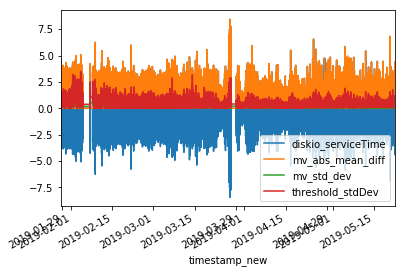

In [70]:
#ts_diff_merged = pd.concat([ts_diff, ts_diff_merged], axis=1)
#ts_diff_merged.columns
ts_diff_merged[['diskio_serviceTime','mv_abs_mean_diff','mv_std_dev','threshold_stdDev']].plot()

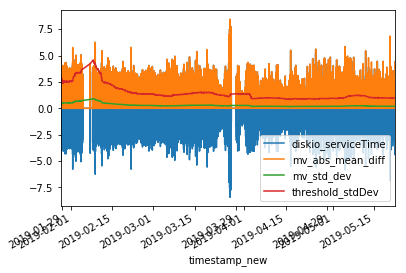

In [23]:
#ts_diff_merged = pd.concat([ts_diff, ts_diff_merged], axis=1)
#ts_diff_merged.columns
ts_diff_merged[['diskio_serviceTime','mv_abs_mean_diff','mv_std_dev','threshold_stdDev']].plot()

In [ ]:
ts_diff['isAnomaly'].value_counts()

In [18]:
ts_diff['isAnomaly'].value_counts()

False    14351591
True         7059
Name: isAnomaly, dtype: int64

In [65]:
ts_diff_merged.head()

,mv_abs_mean_diff,mv_std_dev,isAnomaly
timestamp_new,,,
2019-01-28 08:56:15.556,1.812379,0.0,True
2019-01-28 08:56:25.551,1.812379,0.0,True
2019-01-28 08:56:25.551,0.000000,0.0,False
2019-01-28 08:56:25.554,0.000000,0.0,False
2019-01-28 08:56:25.554,0.000000,0.0,False


In [64]:
ts_diff_merged['isAnomaly'].value_counts()

False    13673752
True       684898
Name: isAnomaly, dtype: int64

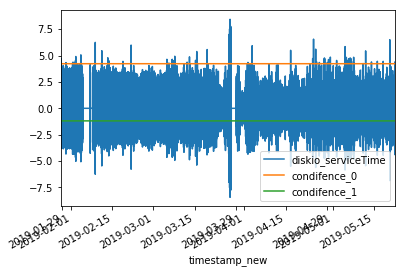

In [19]:
ts_diff[['diskio_serviceTime','condifence_0','condifence_1']].plot()

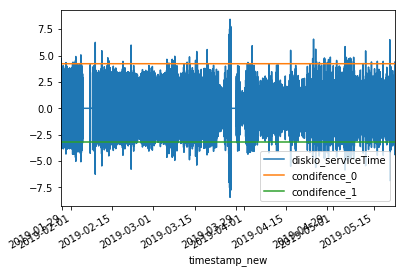

In [28]:
ts_diff[['diskio_serviceTime','condifence_0','condifence_1']].plot()

In [19]:
sample_anomaly = ts_diff[ts_diff['isAnomaly']==True].sample()
sample_anomaly.index

DatetimeIndex(['2019-05-07 23:59:03.066000'], dtype='datetime64[ns]', name='timestamp_new', freq=None)

In [68]:
sample_anomaly.index.values[0]

numpy.datetime64('2019-02-02T12:10:35.556000000')

In [20]:
#ts_diff.loc[sample_anomaly.index]
#ts_diff.index.get_loc(sample_anomaly.index.values[0]).stop
#type(ts_diff.iloc[ts_diff.index.get_loc(sample_anomaly.index.values[0]).stop-1])
previous_nWindow = pd.DataFrame([ts.iloc[ts_diff.index.get_loc(sample_anomaly.index.values[0]).stop-i] for i in range(1,101)])

In [22]:
previous_nWindow.head()

,diskio_serviceTime,process_summary_total,load_1min,memory_used_pct,memory_actual_free,cpu_iowait_pct,cpu_user_pct
2019-05-07 23:59:03.066,0.000000,218.0,0.02,0.9352,3.832263e+09,0.002,0.0660
2019-05-07 23:59:03.066,0.000000,218.0,0.02,0.9352,3.832263e+09,0.002,0.0660
2019-05-07 23:59:03.066,0.000000,218.0,0.02,0.9352,3.832263e+09,0.016,0.3206
2019-05-07 23:59:03.066,0.031979,218.0,0.02,0.9352,3.832263e+09,0.002,0.0660
2019-05-07 23:59:03.066,0.000000,218.0,0.02,0.9355,3.809669e+09,0.002,0.0660


# Correlation

In [21]:
from scipy.stats import linregress
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr

In [24]:
for col in previous_nWindow.columns:
    if col != 'diskio_serviceTime':
        print("Correlation between diskio_serviceTime and {}".format(col))
        print(linregress(previous_nWindow[1:]['diskio_serviceTime'], previous_nWindow[1:][col]))
        print(pearsonr(previous_nWindow[1:]['diskio_serviceTime'], previous_nWindow[1:][col]))
        
        corr, _ = spearmanr(previous_nWindow[1:]['diskio_serviceTime'], previous_nWindow[1:][col])
        print('Spearmans correlation: %.3f' % corr)
        print()

Correlation between diskio_serviceTime and process_summary_total
LinregressResult(slope=0.803664710136756, intercept=217.0092756467922, rvalue=0.14285983009454373, pvalue=0.15835329378598934, stderr=0.5653290600778388)
(0.14285983009454384, 0.1583532937859892)
Correlation between diskio_serviceTime and load_1min
LinregressResult(slope=-0.002175847770335685, intercept=0.0031761216125714823, rvalue=-0.052028074359645834, pvalue=0.609039596527335, stderr=0.004240492414260365)
(-0.05202807435964596, 0.6090395965273343)
Correlation between diskio_serviceTime and memory_used_pct
LinregressResult(slope=3.683463254793052e-05, intercept=0.9351545918004778, rvalue=0.1078683438047369, pvalue=0.28789528358282634, stderr=3.446950252144825e-05)
(0.10786834380473703, 0.2878952835828263)
Correlation between diskio_serviceTime and memory_actual_free
LinregressResult(slope=-172252.37415799822, intercept=3832299227.5218897, rvalue=-0.013009623531107259, pvalue=0.8983028624343814, stderr=1344243.251231540

In [ ]:
#aonao.AO.rolling(window=120).corr(other=aonao.NAO).plot(style='-g')
#aonao.corr()

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
#https://ourcodingclub.github.io/2019/01/07/pandas-time-series.html

#pd.plotting.autocorrelation_plot(df["R"].resample("1y").median())
#df.plot.box()
#df[["F10.7", "R"]].resample("1y").median().plot(figsize=(15,4))


### Forecasting

Lets make model on the TS after differencing as it is a very popular technique. Also, its relatively easier to add noise and seasonality back into predicted residuals in this case. Having performed the trend and seasonality estimation techniques, there can be two situations:

1. A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
2. A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.

Let me give you a brief introduction to ARIMA. I won’t go into the technical details but you should understand these concepts in detail if you wish to apply them more effectively. ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

1. Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
2. Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
3. Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.



**Selecting p, q, and d values**
1. Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
2. Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.


In [32]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
# custom
ts_diff = ts_sqr['diskio_serviceTime']

In [ ]:
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

/home/achyuta/Achyuta/venv3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/achyuta/Achyuta/venv3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:386: RuntimeWarning: invalid value encountered in subtract
  xo = x - x.mean()


Text(0.5,1,u'Partial Autocorrelation Function')

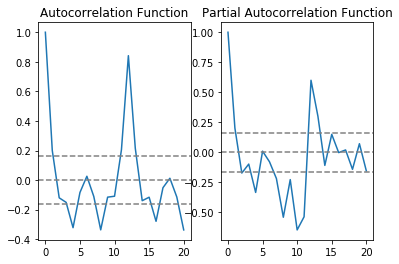

In [108]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

p = 2, q = 2

Now AR, MA & ARIMA models for the data

In [109]:
from statsmodels.tsa.arima_model import ARIMA

AR model

Text(0.5,1,u'RSS: 1.5023')

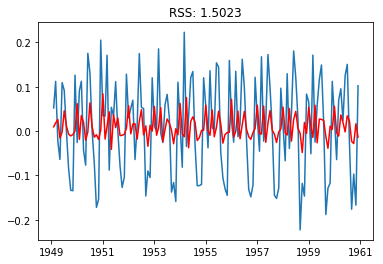

In [111]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_diff)**2))

Text(0.5,1,u'RSS: 1.4721')

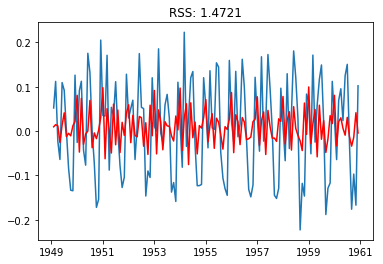

In [114]:
# MA model

model = ARIMA(ts_log, order=(0, 1, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_diff)**2))

In [ ]:
# ARIMA model

model = ARIMA(ts_log, order=(2, 1, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_diff)**2))

In [120]:
preds = pd.Series(results_AR.fittedvalues, copy = True)
preds_cumsum = preds.cumsum()
print preds_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [125]:
preds_log = pd.Series(ts_log.ix[0], index=ts_log.index)
preds_log = preds_log.add(preds_cumsum,fill_value=0)
preds_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5,1,u'RMSE: 90.1046')

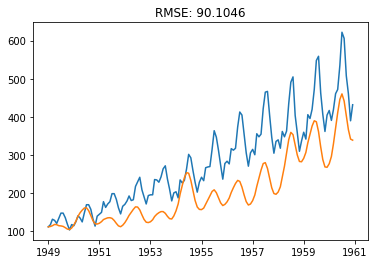

In [127]:
preds_ARIMA = np.exp(preds_log)
plt.plot(ts)
plt.plot(preds_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((preds_ARIMA-ts)**2)/len(ts)))

# isolation_forest
https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(ts_log['diskio_serviceTime'].values.reshape(-1, 1))
xx = np.linspace(ts_log['diskio_serviceTime'].min(), ts_log['diskio_serviceTime'].max(), len(ts_log)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('diskio_serviceTime')
plt.show();

In [10]:
len(outlier)

14358651

# KNN

In [ ]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = KNN(contamination=outliers_fraction)
clf.fit(X)
scores_pred = clf.decision_function(X) * -1
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))

df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['Sales'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['Profit'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['Sales'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['Profit'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)

threshold = percentile(scores_pred, 100 * outliers_fraction)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')       
plt.axis('tight')  
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('K Nearest Neighbors (KNN)')
plt.show();

# One Class SVM

In [ ]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train oneclassSVM 
model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
model.fit(data)
df['anomaly3'] = pd.Series(model.predict(data))

fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly3'] == -1, ['date_time_int', 'price_usd']] #anomaly

ax.plot(df['date_time_int'], df['price_usd'], color='blue')
ax.scatter(a['date_time_int'],a['price_usd'], color='red')
plt.show();

# PyOD

In [10]:
#! pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org pyod

In [11]:
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
#sys.path.append(
#    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

#import numpy as np
from scipy import stats
from numpy import percentile
#import matplotlib.pyplot as plt
import matplotlib.font_manager

# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP

In [12]:
# df[['Item_MRP','Item_Outlet_Sales']].head()
#X1 = df['Item_MRP'].values.reshape(-1,1)
#X2 = df['Item_Outlet_Sales'].values.reshape(-1,1)
#X = np.concatenate((X1,X2),axis=1)

#ts_log['diskio_serviceTime'] = ts_log['diskio_serviceTime'].apply(lambda x: handle_inf(x))
df = ts_log
X = ts_log['diskio_serviceTime'].values.reshape(-1,1)

In [31]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.05
# Define seven outlier detection tools to be compared
classifiers = {
        #'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        #'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        #'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        #'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        #'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

In [ ]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))
cols = ['diskio_serviceTime']

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = df
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx[cols[0]][dfx['outlier'] == 0]).reshape(-1,1)
    #IX2 =  np.array(dfx['Item_Outlet_Sales'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx[cols[0]][dfx['outlier'] == 1].values.reshape(-1,1)
    #OX2 =  dfx['Item_Outlet_Sales'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = clf.decision_function(np.c_[xx.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    #b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    b = plt.scatter(range(0,len(IX1)),IX1, c='white',s=20, edgecolor='k')
    
    #c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
    c = plt.scatter(range(0,len(OX1)),OX1, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
plt.show()

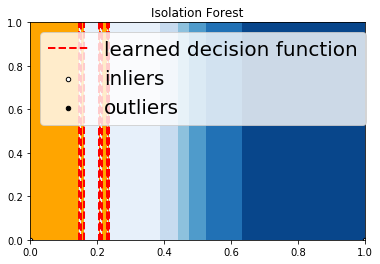

In [30]:
if True:
     # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    #b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    b = plt.scatter(range(0,len(IX1)),IX1, c='white',s=20, edgecolor='k')
    
    #c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
    c = plt.scatter(range(0,len(OX1)),OX1, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
plt.show()

In [ ]:
from pyod.models.knn import KNN   # kNN detector

# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X)

# get the prediction label and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# Holts winter(https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/)

In [1]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_Winter))
print(rms)

# pmdarima

In [ ]:
#! pip install pmdarima

In [ ]:
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pmdarima as pm

wineind = pm.datasets.load_wineind()
train, test = wineind[:150], wineind[150:]

pipeline = Pipeline([
    ("boxcox", BoxCoxEndogTransformer()),
    ("model", pm.AutoARIMA(seasonal=True, suppress_warnings=True))
])

pipeline.fit(train)
pipeline.predict(5)

# PBAD: Pattern-Based Anomaly detection
https://bitbucket.org/len_feremans/pbad/src/master/

In [6]:
#!git clone git@bitbucket.org:len_feremans/pbad.git
#!cd pbad/src/utils/cython_utils/
#!python setup.py build_ext --inplace

In [10]:
import sys, os, time
# try loading the relevant methods
try:
    cwd = os.getcwd()
    src_path = 'pbad/src'#os.path.join(cwd.split('notebooks')[0], 'src')
    sys.path.insert(0, src_path)
except:
    print('Failed to add path')
    pass

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score

from methods.PreProcessor import PreProcessor
from methods.PBAD import PBAD

# Univariate input file has three columns: timestamp, value and label.
# Label is either 0=unknown, 1=normal or -1=abnormal
# timestamp,value,label
# 2013-07-04 00:00:00,0.43,0
# 2013-07-04 01:00:00,0.48,0
#input_file =  './univariate/ambient_temperature/train_data.csv'

# 1. preprocess the data
#univariate_data = pd.read_csv(input_file, header=0, index_col=0) #index on timestamp column
#ts = {0: univariate_data.iloc[:, 0].values} #value column
#labels = univariate_data.iloc[:, 1].values  #label column

#preprocesser = PreProcessor(window_size=12, window_incr=6, alphabet_size=30)
#ts_windows_discretized, ts_windows, _, window_labels = preprocesser.preprocess(continuous_series=ts, labels=labels,
#                                                                       return_undiscretized=True)

#df1 = pd.read_pickle("../../../dummy.pkl")
#ts = df1.loc[:,['diskio_serviceTime']]
#ts.sort_index(ascending=True, inplace=True)
#print(ts.head(10))
tss2 = ts.copy()
ts = {0: tss2.iloc[:, 0].values}
labels = np.array([0]*tss2.iloc[:, 0].values)
preprocesser = PreProcessor(window_size=12, window_incr=6, alphabet_size=30)
ts_windows_discretized, ts_windows, _, window_labels = preprocesser.preprocess(continuous_series=ts, labels=labels, return_undiscretized=True)

# 2. run PBAD on the data
pbad = PBAD(relative_minsup=0.01, jaccard_threshold=0.9, pattern_type='all', pattern_pruning='maximal')
scores = pbad.fit_predict(ts_windows, ts_windows_discretized)

# 3. evaluation on labeled segments
filter_labels = np.where(window_labels != 0)[0]
print('AUROC =', roc_auc_score(y_true=window_labels[filter_labels], y_score=scores[filter_labels])) #AUROC = 0.997

# PyFlux
https://pyflux.readthedocs.io/en/latest/

# Luminol

In [2]:
import missingno as msno
from luminol import anomaly_detector
from luminol import correlator
from luminol import utils
from luminol.modules.time_series import TimeSeries
from luminol.utils import to_epoch

import time

In [11]:
# load pickle as DF
df2 = pd.read_pickle("./dummy_work.pkl")
ts2 = df2.loc[:,['diskio_serviceTime']]
ts2.sort_index(ascending=True, inplace=True)
ts2.head()

,diskio_serviceTime
timestamp_new,
2019-01-28 08:56:15.556,0.000000
2019-01-28 08:56:15.556,0.163265
2019-01-28 08:56:25.551,0.000000
2019-01-28 08:56:25.551,0.000000
2019-01-28 08:56:25.554,0.000000


In [ ]:
#df1.index = df1.index.map(lambda d: to_epoch(str(d)))
#df1.to_pickle("./dummy_work_with_epochs.pkl")

# load pickle as DF
df1 = pd.read_pickle("./dummy_work_with_epochs.pkl")
#print(df1.head())
ts = df1.loc[:,['diskio_serviceTime']]
ts.sort_index(ascending=True, inplace=True)
print(ts.head(10))

In [97]:
#df1 = pd.read_pickle('custom_data_variation_data_01.pickle')
#df1.index = df1.index.map(lambda d: to_epoch(str(d)))
#df1.to_pickle("./custom_data_variation_data_epochs_01.pkl")

In [63]:
#df1 = pd.read_pickle('custom_data_variation_data.pickle')
# load pickle as DF
df2 = pd.read_pickle("custom_data_variation_data_02.pickle")
#ts2 = df2.loc[:,['diskio_serviceTime']]
ts2 = df2.loc[:'2019-03-27 10:00',['diskio_serviceTime']]
ts2.sort_index(ascending=True, inplace=True)
#ts2.head()

#df1 = pd.read_pickle('custom_data_variation_data_epochs_01.pkl')
df1 = ts2.copy()
df1.index = df1.index.map(lambda d: to_epoch(str(d)))
ts = df1.loc[:,['diskio_serviceTime']]
ts.sort_index(ascending=True, inplace=True)
print(ts.head(10))

               diskio_serviceTime
timestamp_new                    
1.552608e+12             1.052632
1.552608e+12             1.052632
1.552608e+12             0.000000
1.552608e+12             0.000000
1.552608e+12             0.000000
1.552608e+12             0.000000
1.552608e+12             0.000000
1.552608e+12             0.000000
1.552608e+12             0.000000
1.552608e+12             0.000000


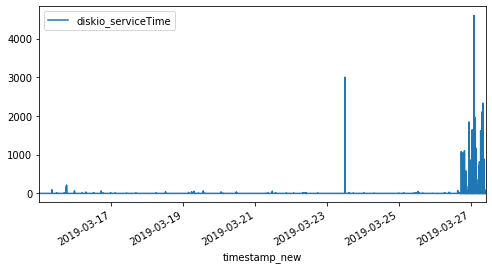

In [64]:
ts2.plot(figsize=(8,4))

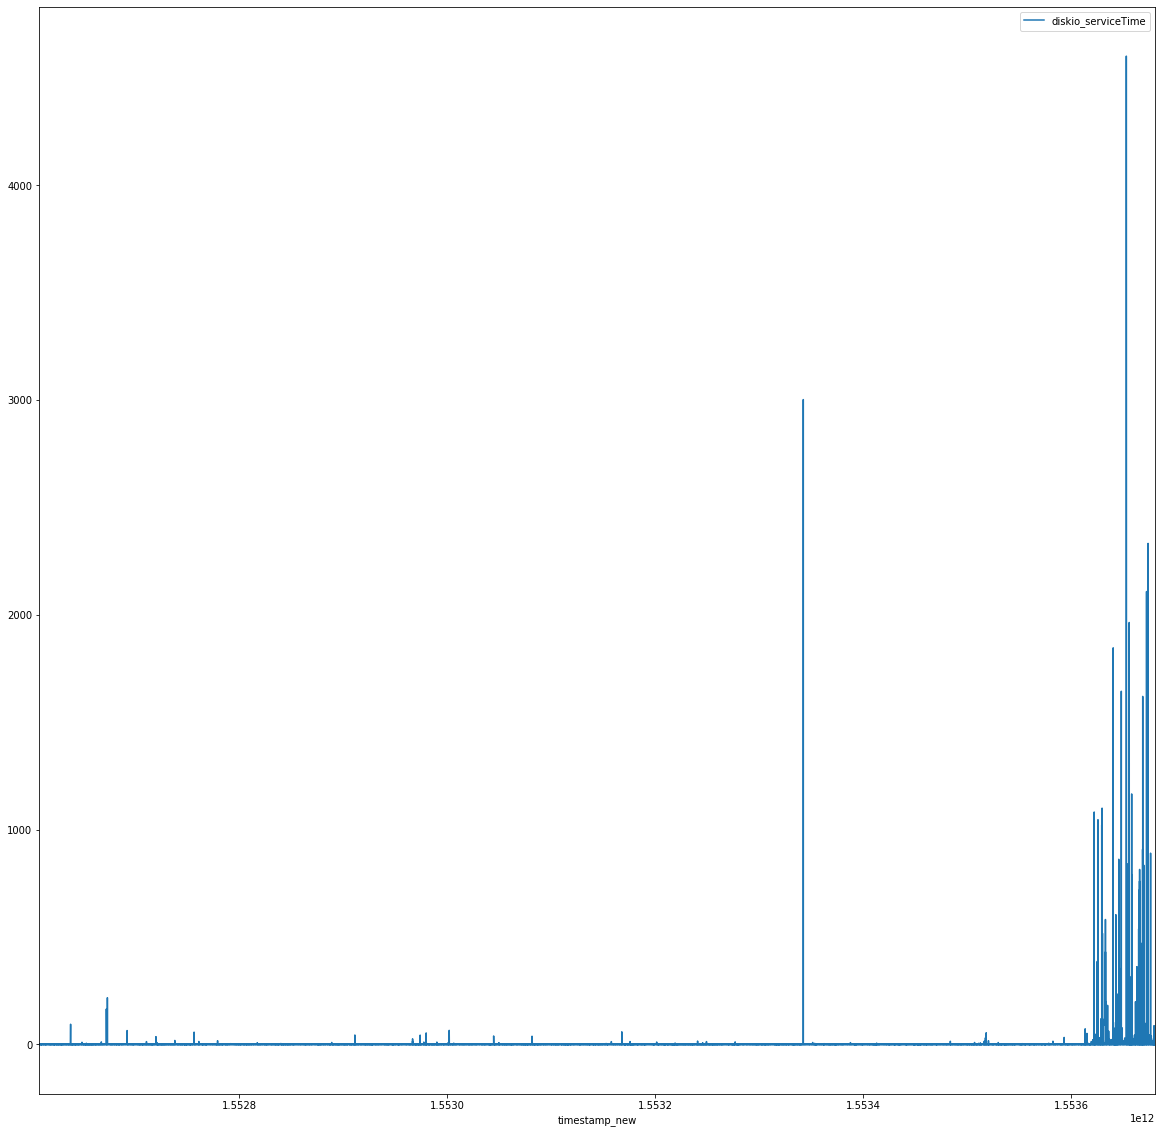

In [65]:
ts.plot()

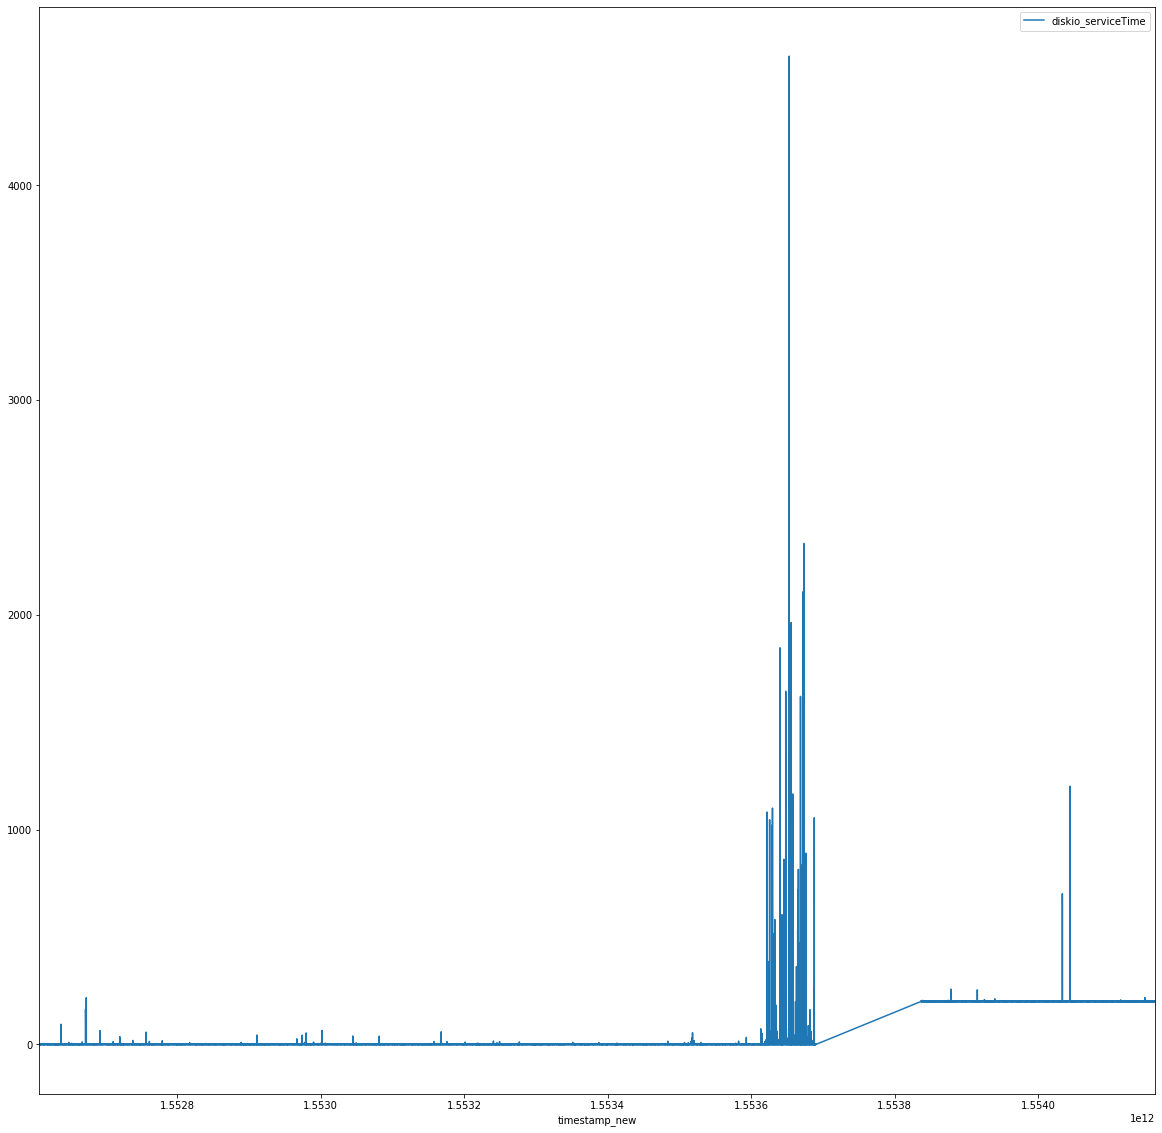

In [7]:
ts.plot()

In [38]:
to_epoch(str('2019-03-27 11:44:33'))

1553687073000.0

In [67]:
#ts.loc['1554032673089.0']
#ts.iloc[1552608003066]
ts['timestamp_new'] = ts2.index
ts.head()
#ts2.head()
#s1 = pd.Series(ts2.index, name='timestamp_new')
#ts_ts2 = pd.concat([ts, s1], axis=1)
#ts_ts2.head()
#ts.index

,diskio_serviceTime,timestamp_new
timestamp_new,,
1.552608e+12,1.052632,2019-03-15 00:00:03.066
1.552608e+12,1.052632,2019-03-15 00:00:03.066
1.552608e+12,0.000000,2019-03-15 00:00:03.066
1.552608e+12,0.000000,2019-03-15 00:00:03.066
1.552608e+12,0.000000,2019-03-15 00:00:03.066


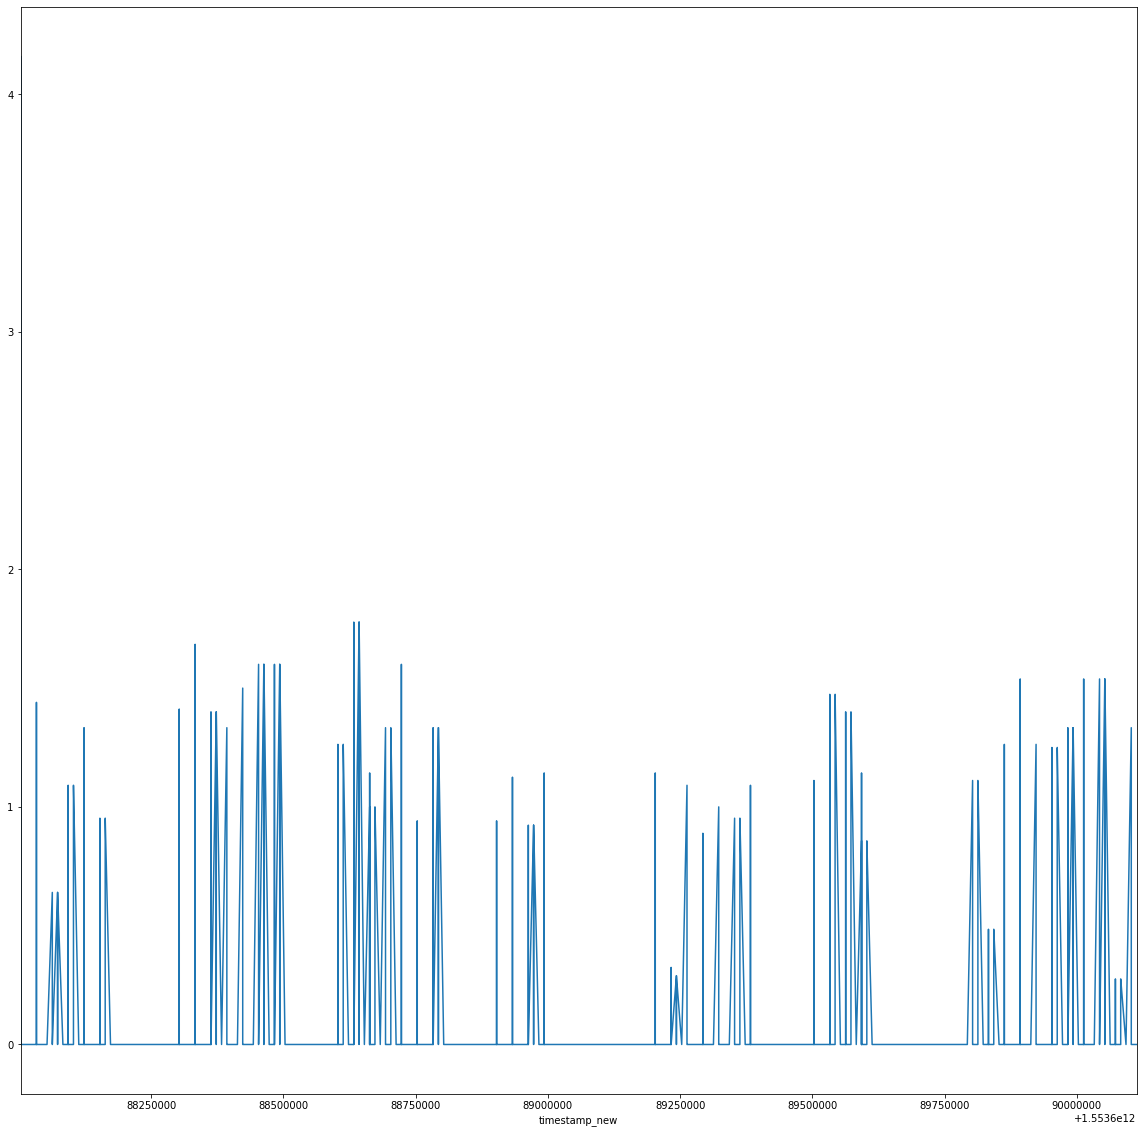

In [73]:
ts[(ts['timestamp_new']>='2019-03-27 12:00:00') & (ts['timestamp_new']<'2019-03-27 16:00:00')]['diskio_serviceTime'].plot()
test_x = ts[(ts['timestamp_new']>='2019-03-27 12:00:00') & (ts['timestamp_new']<'2019-03-27 16:00:00')]

In [70]:
ts['timestamp_new'].dtypes

dtype('<M8[ns]')

In [66]:
ts_copy = ts.copy()#['2019-mar-15':'2019-apr-15'].copy()['2019-03-15':'2019-03-27 06:59']
#ts_copy.index = ts_copy.index.map(lambda d: to_epoch(str(d)))
ts_dict = ts_copy['diskio_serviceTime'].to_dict()

#ts_copy1 = ts['2019-mar-15':'2019-apr-15'].copy()
#ts_dict = TimeSeries(ts_copy1['diskio_serviceTime'].to_dict())
#ts2 = df['cpu_iowait_pct'].to_dict()
print(ts.head())
print(ts_copy.head())
print(len(ts_copy))
#print(type(ts['diskio_serviceTime']))
#print(len(ts2))

               diskio_serviceTime
timestamp_new                    
1.552608e+12             1.052632
1.552608e+12             1.052632
1.552608e+12             0.000000
1.552608e+12             0.000000
1.552608e+12             0.000000
               diskio_serviceTime
timestamp_new                    
1.552608e+12             1.052632
1.552608e+12             1.052632
1.552608e+12             0.000000
1.552608e+12             0.000000
1.552608e+12             0.000000
1288768


In [67]:
detector = anomaly_detector.AnomalyDetector(ts_dict,score_percent_threshold=0.2)#,score_percentile_threshold=0.1

In [79]:
algorithm_name = 'bitmap_detector'
algorithm_params = {
      'precision': 4,# how many sections to categorize values,
      'lag_window_size': 24*60*80,#80000,# lagging window size,
      'future_window_size': 60*80,#80000,# future window size,
      'chunk_size': 2# chunk size.
    }
detector = anomaly_detector.AnomalyDetector(ts_dict,score_percent_threshold=0.2,algorithm_name=algorithm_name,
                                            algorithm_params=algorithm_params)#,score_percentile_threshold=0.1
#detector = anomaly_detector.AnomalyDetector(ts_dict,algorithm_name=algorithm_name)#,score_percentile_threshold=0.1

In [94]:
help(anomaly_detector.AnomalyDetector)

Help on class AnomalyDetector in module luminol.anomaly_detector:

class AnomalyDetector(builtins.object)
 |  AnomalyDetector(time_series, baseline_time_series=None, score_only=False, score_threshold=None, score_percent_threshold=None, algorithm_name=None, algorithm_params=None, refine_algorithm_name=None, refine_algorithm_params=None, algorithm_class=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, time_series, baseline_time_series=None, score_only=False, score_threshold=None, score_percent_threshold=None, algorithm_name=None, algorithm_params=None, refine_algorithm_name=None, refine_algorithm_params=None, algorithm_class=None)
 |      Initializer
 |      :param time_series: a TimeSeries, a dictionary or a path to a csv file(str).
 |      :param baseline_time_series: a TimeSeries, a dictionary or a path to a csv file(str).
 |      :param bool score_only: if asserted, only anomaly scores are computed.
 |      :param float score_percent_threshold: percent threshold on anomal

In [80]:
score = detector.get_all_scores()
anomalies = detector.get_anomalies()

In [81]:
if anomalies:
    time_period = anomalies[0].get_time_window()
    anom_dict = anomalies[0].__dict__
    print(time_period)
    start_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time_period[0] / 1000))
    end_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time_period[1] / 1000))
    exact_timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(anom_dict['exact_timestamp'] / 1000))
    print(ts2[start_time:end_time])
    print("====Exact Error===")
    print(ts2[exact_timestamp])
    
    #correlator = correlator.Correlator(ts, ts2, time_period)
    #print(correlator.get_correlation_result().coefficient)

(1553341483066, 1553342413089)
                         diskio_serviceTime
timestamp_new                              
2019-03-23 11:44:43.066                 0.0
2019-03-23 11:44:43.066                 0.0
2019-03-23 11:44:43.066                 0.0
2019-03-23 11:44:43.066                 0.0
2019-03-23 11:44:43.066                 0.0
...                                     ...
2019-03-23 12:00:13.066              3000.0
2019-03-23 12:00:13.066              3000.0
2019-03-23 12:00:13.066              3000.0
2019-03-23 12:00:13.066              3000.0
2019-03-23 12:00:13.089              3000.0

[1128 rows x 1 columns]
====Exact Error===
                         diskio_serviceTime
timestamp_new                              
2019-03-23 12:00:13.066              3000.0
2019-03-23 12:00:13.066              3000.0
2019-03-23 12:00:13.066              3000.0
2019-03-23 12:00:13.066              3000.0
2019-03-23 12:00:13.066              3000.0
2019-03-23 12:00:13.066              3000.0
2

In [82]:
tmp_list = []
for anom in anomalies:
    #print(anom.get_time_window())
    time_period = anom.get_time_window()
    anom_dict = anom.__dict__
    print(anom_dict)
    print(time_period)
    start_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time_period[0] / 1000))
    end_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time_period[1] / 1000))
    exact_timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(anom_dict['exact_timestamp'] / 1000))
    #print(ts2[start_time:end_time]['diskio_serviceTime'].to_dict())
    #print("====Exact Error===")
    print(ts2[start_time:end_time])
    print(ts2[start_time:end_time].max())
    print(ts2[start_time:end_time].min())
    print("====Exact Error===")
    print(ts2[exact_timestamp])
    #print(ts2['2019-03-27 11:25':exact_timestamp])
    #print(ts2[exact_timestamp:'2019-03-27 15:45'])
    tmp_list.append(ts2[start_time:end_time])
    
    #correlator = correlator.Correlator(ts, ts2, time_period)
    #print(correlator.get_correlation_result().coefficient)
new_df = pd.concat(tmp_list)

{'start_timestamp': 1553341483066, 'end_timestamp': 1553342413089, 'anomaly_score': 342.0, 'exact_timestamp': 1553342413089}
(1553341483066, 1553342413089)
                         diskio_serviceTime
timestamp_new                              
2019-03-23 11:44:43.066                 0.0
2019-03-23 11:44:43.066                 0.0
2019-03-23 11:44:43.066                 0.0
2019-03-23 11:44:43.066                 0.0
2019-03-23 11:44:43.066                 0.0
...                                     ...
2019-03-23 12:00:13.066              3000.0
2019-03-23 12:00:13.066              3000.0
2019-03-23 12:00:13.066              3000.0
2019-03-23 12:00:13.066              3000.0
2019-03-23 12:00:13.089              3000.0

[1128 rows x 1 columns]
diskio_serviceTime    3001.0
dtype: float64
diskio_serviceTime    0.0
dtype: float64
====Exact Error===
                         diskio_serviceTime
timestamp_new                              
2019-03-23 12:00:13.066              3000.0
2019-03-23 

In [ ]:
plt.figure(figsize=(8,4))
orig = plt.plot(ts2, color='blue',label='Original')
err = plt.plot(new_df, color='red', label='error')

plt.legend(loc='best')
plt.title('error')
plt.show(block=False)

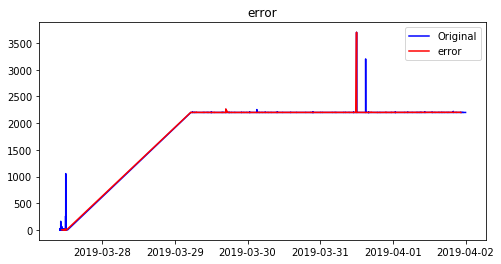

In [13]:
plt.figure(figsize=(8,4))
orig = plt.plot(ts2, color='blue',label='Original')
err = plt.plot(new_df, color='red', label='error')

plt.legend(loc='best')
plt.title('error')
plt.show(block=False)

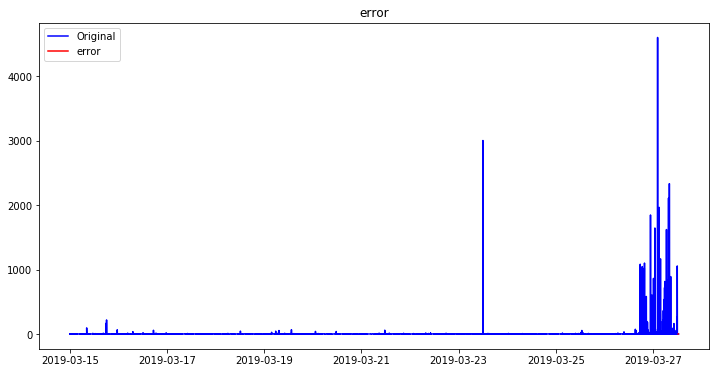

In [99]:
plt.figure(figsize=(12,6))
orig = plt.plot(ts2, color='blue',label='Original')
err = plt.plot(new_df, color='red', label='error')

plt.legend(loc='best')
plt.title('error')
plt.show(block=False)

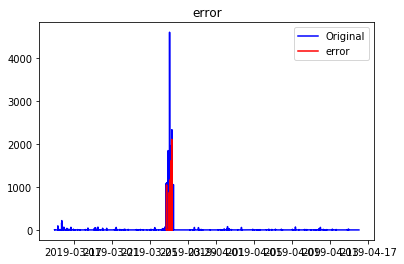

In [59]:
#ts_copy.plot()
#Plot rolling statistics:
orig = plt.plot(ts_copy1, color='blue',label='Original')
mean = plt.plot(new_df, color='red', label='error')

plt.legend(loc='best')
plt.title('error')
plt.show(block=False)

In [ ]:
detector = anomaly_detector.AnomalyDetector(ts_dict, score_threshold=1.5)
score = detector.get_all_scores()
anomalies = detector.get_anomalies()

if anomalies:
    time_period = anomalies[0].get_time_window()
    #correlator = correlator.Correlator(ts, ts2, time_period)
    print(time_period)
    #print(correlator.get_correlation_result().coefficient)

In [47]:
for ind,kl in enumerate(ts_dict.items()):
    print(kl[0],kl[1])
    if ind==4:
        break

2019-01-28 08:56:15.556000 0.16326529999999997
2019-01-28 08:56:25.551000 0.0
2019-01-28 08:56:25.554000 0.0
2019-01-28 08:56:25.555000 0.0
2019-01-28 08:56:25.556000 0.0


In [12]:
10*0.2

2.0

In [ ]:
from luminol.modules.time_series import TimeSeries
from luminol.utils import to_epoch

# generate random time series in pandas
rng = pd.date_range('1/1/2011', periods=72, freq='H')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts2 = pd.Series(np.random.randn(len(rng)), index=rng)

# transform index values to epoch time
ts.index = ts.index.map(lambda d: to_epoch(str(d)))
lts = TimeSeries(ts.to_dict())
#print(lts[:5])
ts2.index = ts2.index.map(lambda d: to_epoch(str(d)))
lts2 = TimeSeries(ts2.to_dict())
#print(lts2[:5])

detector = anomaly_detector.AnomalyDetector(lts)
anomalies = detector.get_anomalies()

if anomalies:
    time_period = anomalies[0].get_time_window()
    #correlator = correlator.Correlator(lts, lts2, time_period)
    print(time_period)
    #print(correlator.get_correlation_result().coefficient)

# OneClassSVM

In [13]:
from sklearn.svm import OneClassSVM

In [ ]:
#data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
#scaler = StandardScaler()
#np_scaled = scaler.fit_transform(data)
#data = pd.DataFrame(np_scaled)
ts2_copy = ts2.copy()
# train oneclassSVM 
outliers_fraction = 0.01
model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
model.fit(ts2_copy)
ts2_copy['anomaly3'] = pd.Series(model.predict(ts2_copy))

fig, ax = plt.subplots(figsize=(10,6))
a = ts2_copy.loc[ts2_copy['anomaly3'] == -1] #anomaly

ax.plot(ts2_copy.index, ts2_copy['diskio_serviceTime'], color='blue')
ax.scatter(a.index,a['diskio_serviceTime'], color='red')
plt.show();